<img src = "https://raw.githubusercontent.com/bgonzalezgo/UdeCatalunya/refs/heads/main/logo_uc_grande.png" alt = "Encabezado" width = "100%">  </img>

**Especializacón en Big Data y Analítica de Datos** <br><br>
***Materia: Limpieza y tranformación de datos*** <br><br>
***Actividad Individual – Inspección inicial de datos con Python y pandas*** <br><br>
***Estudiantes: Brandon González Gómez - María Alejandra Tejada Orjuela - Leydy Johana Silva Ruiz***

# *Actividad a resolver*

*1. Contexto del Proyecto* <br> <br>
Una prestigiosa firma de análisis inmobiliario, "DataProp S.A.S.", los ha contratado como
equipo de científicos de datos. Su primer encargo es tomar un dataset crudo de anuncios de
propiedades y transformarlo en un activo de datos confiable, limpio y listo para ser utilizado
en modelos de predicción de precios y análisis de mercado. <br> <br>
Dataset Oficial: <br>
* Dataset anuncios_inmobiliarios actividad evaluativa.csv
* Este es un conjunto de datos real que contiene aproximadamente 1,000 registros de
anuncios inmobiliarios en diversas ciudades de Colombia, presentando desafíos de
calidad típicos del sector (datos faltantes, inconsistencias, duplicados).

*2. Objetivo del Proyecto*
* Objetivo de Negocio: Preparar y validar un conjunto de datos de alta calidad que sirva
como base para el futuro equipo de Machine Learning de "DataProp S.A.S.". La
fiabilidad de este dataset es crítica para el éxito de los modelos de la compañía.
* Objetivo Académico: Aplicar un proceso estructurado de limpieza de datos,
demostrando habilidades en la identificación, diagnóstico, tratamiento y validación de
problemas de calidad de datos utilizando Python y la librería pandas.

## *Configuración del Entorno*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime


print("✅ Librerías importadas exitosamente")
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")
print(f"Versión de seaborn: {sns.__version__}")
print(f"Versión de matplotlib: {matplotlib.__version__}")

✅ Librerías importadas exitosamente
Versión de pandas: 2.1.4
Versión de numpy: 1.26.4
Versión de seaborn: 0.13.2
Versión de matplotlib: 3.7.5


## *Carga y Exploración Inicia*

In [2]:
# El archivo se carga en un repositorio de github de un participante del equipo para tenerlo siempre disponible

try:
    # Intentar cargar el archivo
    url = "https://raw.githubusercontent.com/bgonzalezgo/UdeCatalunya/refs/heads/main/anuncios_inmobiliarios.csv" # en la variable URL se guarda el link del dataset
    df = pd.read_csv(url, index_col=False, encoding='utf-8', sep=',') # Se selecciona el archivos CSV desde la URL indicando que el separador es ;
    print("✅ Dataset cargado exitosamente desde url del repositorio")
except FileNotFoundError:
    print("❌ Archivo no encontrado en url. Por favor ingrese url correcto del dataser anuncios_inmobiliarios.csv propuesto para la actividad de clase")
    print("💡 Busca en el repositorio el archivo y copia nuevamente la url correctamente para su utilización")

# Mostrar información básica del dataset
if 'df' in locals():
    print(f"Forma del dataset: {df.shape}")
    print(f"Columnas: {list(df.columns)}")

✅ Dataset cargado exitosamente desde url del repositorio
Forma del dataset: (1600, 10)
Columnas: ['ID_Anuncio', 'Agencia', 'Fecha_Publicacion', 'Direccion', 'Ciudad', 'Precio_COP', 'Area_m2', 'Num_Habitaciones', 'Num_Banos', 'Ano_Construccion']


### Exploración Inicial del Dataset

Realizamos una primera inspección para entender la estructura y contenido de nuestros datos.

In [17]:
# Información básica del dataset
print("----- INFORMACIÓN BÁSICA DEL DATASET -----")
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n Información detallada:")
df.info()

----- INFORMACIÓN BÁSICA DEL DATASET -----
Dimensiones: 1600 filas x 10 columnas
Tamaño en memoria: 557.39 KB

 Información detallada:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Anuncio         1600 non-null   int64  
 1   Agencia            1600 non-null   object 
 2   Fecha_Publicacion  1600 non-null   object 
 3   Direccion          1600 non-null   object 
 4   Ciudad             1600 non-null   object 
 5   Precio_COP         1567 non-null   float64
 6   Area_m2            1439 non-null   float64
 7   Num_Habitaciones   1600 non-null   int64  
 8   Num_Banos          1521 non-null   float64
 9   Ano_Construccion   1279 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 125.1+ KB


In [4]:
# Primeras filas del dataset
print("=== PRIMERAS 10 FILAS DEL DATASET ===")
display(df.head(10))

# ültimas filas del dataset
print("\n=== ÚLTIMAS 10 FILAS DEL DATASET ===")
display(df.tail(10))

=== PRIMERAS 10 FILAS DEL DATASET ===


,ID_Anuncio,Agencia,Fecha_Publicacion,Direccion,Ciudad,Precio_COP,Area_m2,Num_Habitaciones,Num_Banos,Ano_Construccion
0,1079,Tu Casa Ideal,2024-09-26,Avenida 138 # 8 - 31,Medellín,1.138000e+09,NaN,2,3.0,1987.0
1,89,Tu Casa Ideal,2023-08-17,Transversal 23 # 25 - 32,Bogotá D.C.,1.702000e+09,64.0,1,1.0,2014.0
2,1011,Tu Casa Ideal,2023-11-17,Carrera 119 # 63 - 26,Bogotá D.C.,5.850000e+08,75.0,5,3.0,1995.0
3,515,Propiedades del Sol,2025-07-07,Transversal 81 # 25 - 39,Barranquilla,1.622000e+09,168.0,1,3.0,2019.0
4,266,Conexión Urbana,2025-02-07,Diagonal 80 # 40 - 77,Cartagena,1.119000e+09,182.0,4,1.0,2009.0
5,57,Conexión Urbana,2024-10-02,Diagonal 20 # 41 - 38,Bogotá D.C.,NaN,176.0,3,4.0,NaN
6,795,Inmobiliaria Andina,2025-04-14,Carrera 76 # 51 - 10,Medellín,9.770000e+08,50.0,2,3.0,2011.0
7,951,Inmobiliaria Andina,2025-05-15,Transversal 22 # 88 - 36,Cali,1.779000e+09,NaN,4,3.0,2006.0
8,1121,Propiedades del Sol,2024-12-21,Diagonal 23 # 68 - 73,Cali,1.646000e+09,321.0,2,1.0,2005.0
9,51,Inmobiliaria Andina,2023-11-30,Calle 93 # 56 - 20,Cartagena,1.721000e+09,127.0,3,2.0,2001.0



=== ÚLTIMAS 10 FILAS DEL DATASET ===


,ID_Anuncio,Agencia,Fecha_Publicacion,Direccion,Ciudad,Precio_COP,Area_m2,Num_Habitaciones,Num_Banos,Ano_Construccion
1590,1387,Conexión Urbana,2024-08-09,Carrera 60 # 11 - 56,Cali,9.440000e+08,54.0,6,1.0,1998.0
1591,1014,Horizonte Propiedades,2024-05-21,Transversal 121 # 17 - 81,Bogotá D.C.,2.220000e+08,82.0,1,2.0,2002.0
1592,1382,Inmobiliaria Andina,2025-03-15,Calle 38 # 9 - 14,Medellín,1.458000e+09,79.0,6,NaN,2011.0
1593,1005,Conexión Urbana,2025-05-16,Avenida 89 # 43 - 95,Medellín,1.580000e+08,224.0,2,1.0,NaN
1594,1046,Propiedades del Sol,2024-12-29,Avenida 130 # 75 - 95,Bogotá D.C.,1.900000e+09,113.0,5,1.0,1982.0
1595,677,Tu Casa Ideal,2023-12-31,Calle 100 # 77 - 71,Medellín,5.000000e+08,260.0,1,1.0,2016.0
1596,1154,Propiedades del Sol,2024-01-19,Avenida 39 # 8 - 20,Cali,4.410000e+08,291.0,2,3.0,2018.0
1597,531,Conexión Urbana,2024-08-29,Avenida 43 # 88 - 11,Cali,3.560000e+08,299.0,6,3.0,1998.0
1598,1405,Conexión Urbana,2023-12-07,Avenida 138 # 75 - 22,Cartagena,3.720000e+08,108.0,2,2.0,NaN
1599,572,Propiedades del Sol,2024-01-25,Diagonal 102 # 39 - 20,Cartagena,NaN,246.0,1,1.0,NaN


## *Diagnóstico de Calidad de Datos*

### ***Análisis de Nulos*** <br>
Reporte con conteo y porcentaje de nulos por columna.

In [5]:
# Análisis detallado de datos faltantes
print(f'{"-"*10}  ANÁLISIS DE DATOS FALTANTES {"-"*10}' )

valores_nulos = df.isnull().sum()
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

# Crear DataFrame de reporte
reporte_faltantes = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Totales': len(df),
    'Valores_Nulos': valores_nulos,
    'Valores_Completos': len(df) - valores_nulos,
    'Porcentaje_Nulos': porcentaje_nulos,
    'Porcentaje_Completos': 100 - porcentaje_nulos
})

# Ordenar por porcentaje de valores nulos (descendente)
reporte_faltantes = reporte_faltantes.sort_values('Porcentaje_Nulos', ascending=False).reset_index(drop=True)

# Agregar clasificación de serveridad
def clasificar_servidad(porcentaje):
    if porcentaje == 0:
        return '✅ Perfecto'
    elif porcentaje < 5:
        return '🟡 Leve'
    elif porcentaje < 15:
        return '🟠 Moderado'
    elif porcentaje < 30:
        return '🔴 Severo'
    else:
        return '⚫ Crítico'

reporte_faltantes['Clasificación de serveridad'] = reporte_faltantes['Porcentaje_Nulos'].apply(clasificar_servidad)

print(" Reporte completo de datos faltantes:")
display(reporte_faltantes)

# Resumen ejecutivo
columnas_problema = reporte_faltantes[reporte_faltantes['Porcentaje_Nulos'] > 0]
if not columnas_problema.empty:
    print("\n    Resumen Ejecutivo de Problemas:")
    for index, row in columnas_problema.iterrows():
        print(f"   • Columna: {row['Columna']}, Porcentaje Nulos: {row['Porcentaje_Nulos']:.2f}%, Severidad: {row['Clasificación de serveridad']}")
else:
    print("\nNo se encontraron problemas de datos faltantes en el dataset.")

print(f"\n    Resumen totales:")
print(f"   • Columnas con datos faltantes: {len(columnas_problema)} de {len(df.columns)}")
print(f"   • Total de valores faltantes: {valores_nulos.sum():,}")
print(f"   • Porcentaje general de completitud: {((len(df) * len(df.columns) - valores_nulos.sum()) / (len(df) * len(df.columns)) * 100):.1f}%")

----------  ANÁLISIS DE DATOS FALTANTES ----------
 Reporte completo de datos faltantes:


,Columna,Valores_Totales,Valores_Nulos,Valores_Completos,Porcentaje_Nulos,Porcentaje_Completos,Clasificación de serveridad
0,Ano_Construccion,1600,321,1279,20.0625,79.9375,🔴 Severo
1,Area_m2,1600,161,1439,10.0625,89.9375,🟠 Moderado
2,Num_Banos,1600,79,1521,4.9375,95.0625,🟡 Leve
3,Precio_COP,1600,33,1567,2.0625,97.9375,🟡 Leve
4,ID_Anuncio,1600,0,1600,0.0000,100.0000,✅ Perfecto
5,Agencia,1600,0,1600,0.0000,100.0000,✅ Perfecto
6,Fecha_Publicacion,1600,0,1600,0.0000,100.0000,✅ Perfecto
7,Direccion,1600,0,1600,0.0000,100.0000,✅ Perfecto
8,Ciudad,1600,0,1600,0.0000,100.0000,✅ Perfecto
9,Num_Habitaciones,1600,0,1600,0.0000,100.0000,✅ Perfecto



    Resumen Ejecutivo de Problemas:
   • Columna: Ano_Construccion, Porcentaje Nulos: 20.06%, Severidad: 🔴 Severo
   • Columna: Area_m2, Porcentaje Nulos: 10.06%, Severidad: 🟠 Moderado
   • Columna: Num_Banos, Porcentaje Nulos: 4.94%, Severidad: 🟡 Leve
   • Columna: Precio_COP, Porcentaje Nulos: 2.06%, Severidad: 🟡 Leve

    Resumen totales:
   • Columnas con datos faltantes: 4 de 10
   • Total de valores faltantes: 594
   • Porcentaje general de completitud: 96.3%


***Visualización de Problemas de Calidad*** <br><br>
Creamos visualizaciones para entender mejor los patrones de datos faltantes.

---------- VISUALIZACIÓN DE DATOS FALTANTES ----------


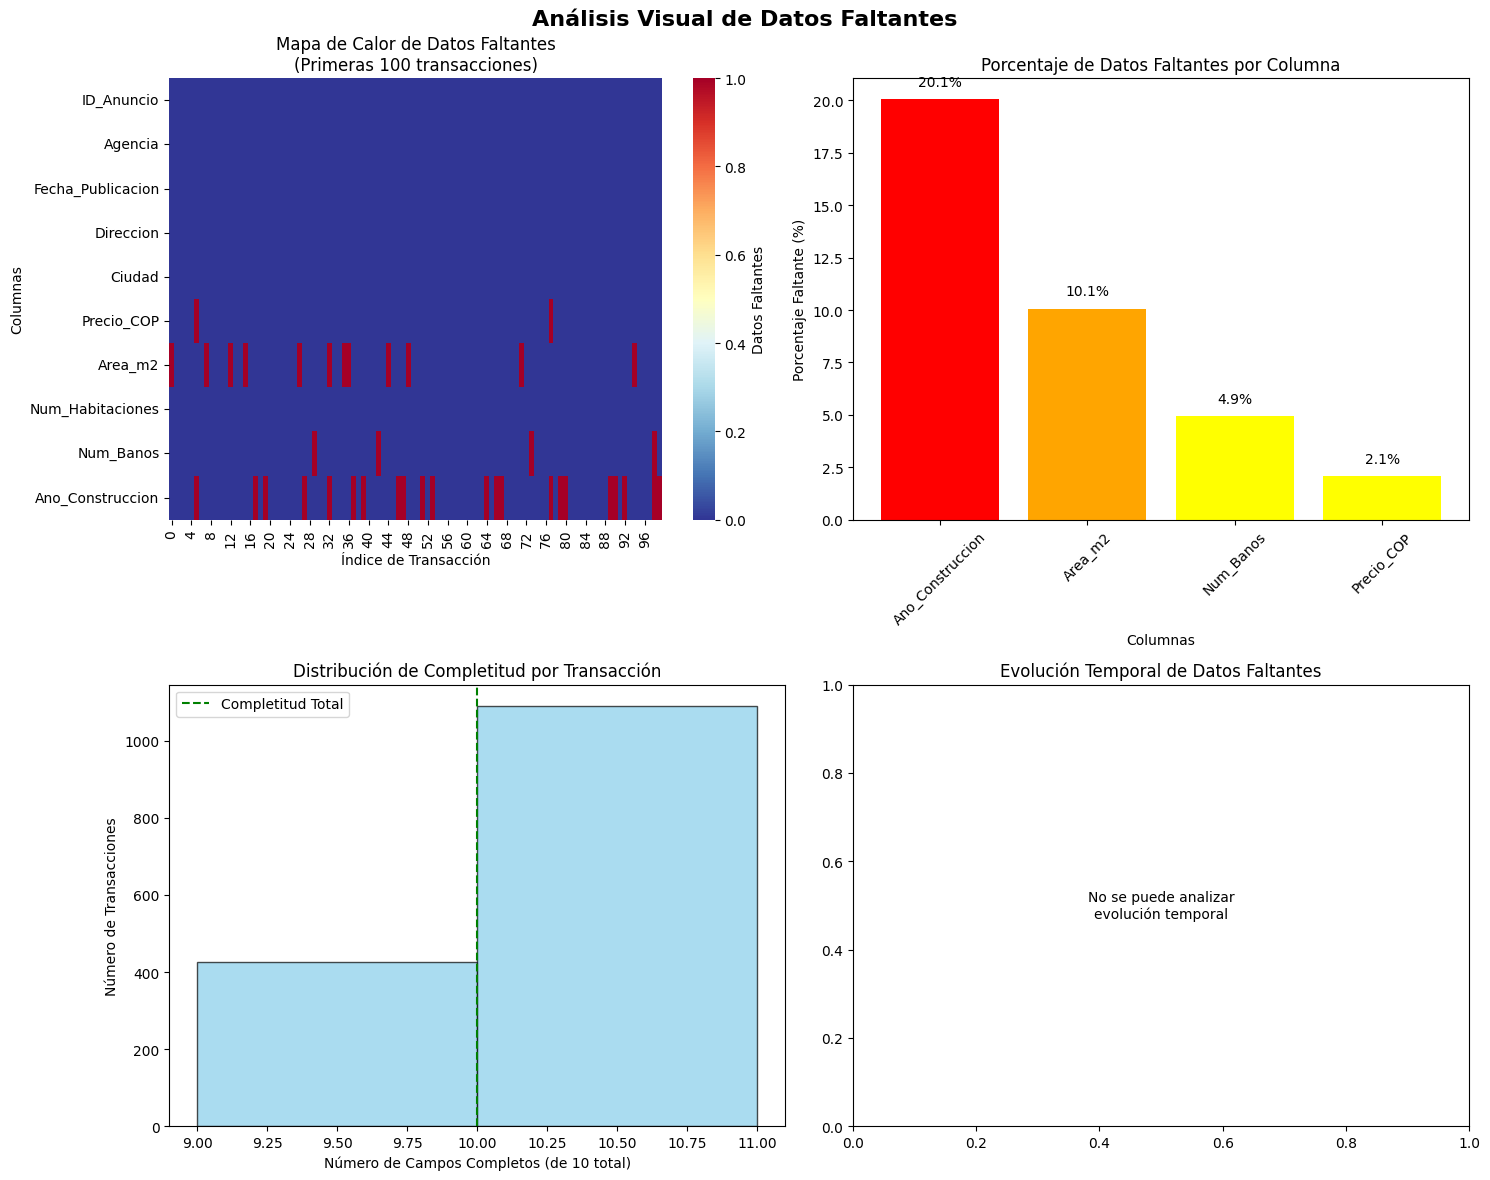

✅ Visualizaciones de datos faltantes generadas


In [6]:
# Visualización de datos faltantes
print(f'{"-"*10} VISUALIZACIÓN DE DATOS FALTANTES {"-"*10}')

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Visual de Datos Faltantes', fontsize=16, fontweight='bold')

# Subplot 1: Mapa de calor de datos faltantes (muestra)
ax1 = axes[0, 0]
matriz_nulos = df.isnull()
# Mostrar solo primeras 100 filas para claridad
sns.heatmap(matriz_nulos.iloc[:100].T,
            cmap='RdYlBu_r',
            cbar_kws={'label': 'Datos Faltantes'},
            ax=ax1)
ax1.set_title('Mapa de Calor de Datos Faltantes\n(Primeras 100 transacciones)')
ax1.set_xlabel('Índice de Transacción')
ax1.set_ylabel('Columnas')

# Subplot 2: Porcentaje de datos faltantes por columna
ax2 = axes[0, 1]
columnas_con_nulos = reporte_faltantes[reporte_faltantes['Porcentaje_Nulos'] > 0]
if len(columnas_con_nulos) > 0:
    colors = ['red' if x > 20 else 'orange' if x > 10 else 'yellow'
              for x in columnas_con_nulos['Porcentaje_Nulos']]
    bars = ax2.bar(range(len(columnas_con_nulos)),
                   columnas_con_nulos['Porcentaje_Nulos'],
                   color=colors)
    ax2.set_title('Porcentaje de Datos Faltantes por Columna')
    ax2.set_xlabel('Columnas')
    ax2.set_ylabel('Porcentaje Faltante (%)')
    ax2.set_xticks(range(len(columnas_con_nulos)))
    ax2.set_xticklabels(columnas_con_nulos['Columna'], rotation=45)

    # Agregar etiquetas de valor en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{height:.1f}%', ha='center', va='bottom')
else:
    ax2.text(0.5, 0.5, '✅ No hay datos faltantes',
             ha='center', va='center', transform=ax2.transAxes, fontsize=14)
    ax2.set_title('Porcentaje de Datos Faltantes por Columna')

# Subplot 3: Distribución de completitud por fila
ax3 = axes[1, 0]
completitud_por_fila = (~matriz_nulos).sum(axis=1)
ax3.hist(completitud_por_fila, bins=range(len(df.columns)-1, len(df.columns)+2),
         alpha=0.7, color='skyblue', edgecolor='black')
ax3.set_title('Distribución de Completitud por Transacción')
ax3.set_xlabel(f'Número de Campos Completos (de {len(df.columns)} total)')
ax3.set_ylabel('Número de Transacciones')
ax3.axvline(x=len(df.columns), color='green', linestyle='--', label='Completitud Total')
ax3.legend()

# Subplot 4: Evolución temporal de datos faltantes (si hay fecha)
ax4 = axes[1, 1]
if 'Fecha_Publicacion' in df.columns:
    try:
        df_temp = df.copy()
        df_temp['Fecha_Publicacion'] = pd.to_datetime(df_temp['Fecha_Publicacion'])
        df_temp['Año_Mes'] = df_temp['Fecha_Publicacion'].dt.to_period('M')

        # Analizar patrones temporales para columnas con datos faltantes
        for columna in columnas_con_nulos['Columna'][:2]:  # Solo primeras 2 para claridad
            patron_temporal = df_temp.groupby('Año_Mes')[columna].apply(
                lambda x: (x.isnull().sum() / len(x)) * 100
            )
            patron_temporal.plot(kind='line', ax=ax4, marker='o', label=columna)

        ax4.set_title('Evolución Temporal de Datos Faltantes')
        ax4.set_xlabel('Período')
        ax4.set_ylabel('Porcentaje Faltante (%)')
        ax4.legend()
        ax4.tick_params(axis='x', rotation=45)
    except:
        ax4.text(0.5, 0.5, 'No se puede analizar\nevolución temporal',
                 ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Evolución Temporal de Datos Faltantes')
else:
    ax4.text(0.5, 0.5, 'No hay columna de fecha\ndisponible',
             ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Evolución Temporal de Datos Faltantes')

plt.tight_layout()
plt.show()

print("✅ Visualizaciones de datos faltantes generadas")

### ***Análisis de Duplicados*** <br>
Reporte de duplicados totales y por ID_Anuncio.

In [ ]:
print(f'{"-"*10} ANÁLISIS DE REGISTROS DUPLICADOS DE ANUNCIOS {"-"*10}')

# --- Reporte de duplicados totales (filas idénticas) ---
duplicados_completos = df.duplicated()
num_duplicados_completos = duplicados_completos.sum()
porcentaje_duplicados_completos = (num_duplicados_completos / len(df) * 100) if len(df) > 0 else 0

print(f'\n • Duplicados completos (filas idénticas) encontrados: {num_duplicados_completos}')
print(f' • Porcentaje del dataset: {porcentaje_duplicados_completos:.2f}%')

if num_duplicados_completos > 0:
    print('\n Ejemplos de duplicados completos:')
    # Asegúrate de mostrar las columnas clave para entender el duplicado
    display(df[duplicados_completos].head()[['ID_Anuncio', 'Direccion', 'Ciudad', 'Precio_COP', 'Fecha_Publicacion']])
else:
    print('No se encontraron duplicados completos en el dataset.')

# --- Reporte de duplicados por ID_Anuncio ---
print(f'\n {"-"*10} ANÁLISIS DE REGISTROS DUPLICADOS POR "ID_Anuncio" {"-"*10}')

if 'ID_Anuncio' in df.columns:
    # 'keep=False' marca TODAS las ocurrencias de un ID_Anuncio que aparece más de una vez.
    duplicados_id_anuncio_mask = df.duplicated(subset=['ID_Anuncio'], keep=False)
    num_filas_con_id_anuncio_duplicado = duplicados_id_anuncio_mask.sum()

    porcentaje_filas_con_id_anuncio_duplicado = (num_filas_con_id_anuncio_duplicado / len(df) * 100) if len(df) > 0 else 0

    print(f'• "ID_Anuncio": {num_filas_con_id_anuncio_duplicado} filas con ID_Anuncio duplicado encontradas.')
    print(f'• Porcentaje del dataset con ID_Anuncio duplicado: {porcentaje_filas_con_id_anuncio_duplicado:.2f}%')

    if num_filas_con_id_anuncio_duplicado > 0:
        print('\n Ejemplos de "ID_Anuncio" duplicados:')
        id_anuncio_counts = df['ID_Anuncio'].value_counts()
        id_anuncio_duplicados_valores = id_anuncio_counts[id_anuncio_counts > 1].index
        ejemplos_df = df[df['ID_Anuncio'].isin(id_anuncio_duplicados_valores)].sort_values('ID_Anuncio')
        # Mostrar las columnas clave
        display(ejemplos_df.head(10)[['ID_Anuncio', 'Direccion', 'Ciudad', 'Precio_COP', 'Fecha_Publicacion']])

        print('\n • Conteo de cada "ID_Anuncio" duplicado:')
        display(id_anuncio_counts[id_anuncio_counts > 1].head())
    else:
        print('No se encontraron "ID_Anuncio" duplicados.')
else:
    print('La columna "ID_Anuncio" no se encontró en el DataFrame.')

# --- Reporte de Duplicados Conceptuales de Anuncios ---
print(f'\n {"-"*10} ANÁLISIS DE REGISTROS DUPLICADOS CONCEPTUALES {"-"*10}')

columnas_clave_conceptual = ['Direccion', 'Ciudad', 'Num_Habitaciones']
columnas_existentes_conceptual = [col for col in columnas_clave_conceptual if col in df.columns]

num_duplicados_conceptuales_adicionales = 0 # Inicializar a 0 por si no se cumplen las condiciones

if len(columnas_existentes_conceptual) == len(columnas_clave_conceptual): # Asegurar que todas las claves existen
    # Paso 1: Crear un DataFrame temporal sin los duplicados completos (manteniendo una copia de cada set).
    # Esto asegura que los 'duplicados_conceptuales_adicionales' no incluyan los completos.
    df_temp_limpio_de_completos = df.drop_duplicates(keep='first')

    # Paso 2: Crear un DataFrame temporal eliminando duplicados por ID_Anuncio de lo que quedó.
    # Esto aísla los casos donde ID_Anuncio es diferente, pero conceptualmente es lo mismo.
    df_temp_limpio_de_ids = df_temp_limpio_de_completos.drop_duplicates(subset=['ID_Anuncio'], keep='first')

    # Paso 3: Identificar duplicados conceptuales en este DataFrame ya pre-limpiado.
    duplicados_conceptuales_adicionales_mask = df_temp_limpio_de_ids.duplicated(subset=columnas_existentes_conceptual, keep=False)
    num_duplicados_conceptuales_adicionales = duplicados_conceptuales_adicionales_mask.sum()

    porcentaje_duplicados_conceptuales_adicionales = (num_duplicados_conceptuales_adicionales / len(df) * 100) if len(df) > 0 else 0

    print(f'• Duplicados conceptuales adicionales encontrados (basado en {", ".join(columnas_existentes_conceptual)}): {num_duplicados_conceptuales_adicionales}')
    print(f'• Porcentaje del dataset (de estos adicionales): {porcentaje_duplicados_conceptuales_adicionales:.2f}%')

    if num_duplicados_conceptuales_adicionales > 0:
        print('\n Ejemplos de "Duplicados Conceptuales Adicionales":')
        ejemplos_conceptuales_adicionales = df_temp_limpio_de_ids[duplicados_conceptuales_adicionales_mask].sort_values(columnas_existentes_conceptual).head(10)
        display(ejemplos_conceptuales_adicionales[['ID_Anuncio', 'Direccion', 'Ciudad', 'Num_Habitaciones', 'Precio_COP', 'Area_m2', 'Fecha_Publicacion']])
    else:
        print('No se encontraron duplicados conceptuales adicionales en el dataset después de las limpiezas básicas.')

else:
    print(f'Las columnas clave para el análisis conceptual ({", ".join(columnas_clave_conceptual)}) no están todas presentes en el DataFrame.')

---------- ANÁLISIS DE REGISTROS DUPLICADOS DE ANUNCIOS ----------

 • Duplicados completos (filas idénticas) encontrados: 40
 • Porcentaje del dataset: 2.50%

 Ejemplos de duplicados completos:


,ID_Anuncio,Direccion,Ciudad,Precio_COP,Fecha_Publicacion
83,502,Avenida 114 # 87 - 57,Bogotá D.C.,1.306000e+09,2024-05-17
264,905,Avenida 127 # 81 - 89,Bogotá D.C.,8.540000e+08,2024-11-28
391,629,Avenida 106 # 19 - 43,Cartagena,1.838000e+09,2023-11-30
423,1082,Calle 53 # 73 - 43,Barranquilla,5.800000e+08,2023-09-10
457,1358,Calle 46 # 12 - 30,Bogotá D.C.,3.210000e+08,2024-04-11



 ---------- ANÁLISIS DE REGISTROS DUPLICADOS POR "ID_Anuncio" ----------
• "ID_Anuncio": 80 filas con ID_Anuncio duplicado encontradas.
• Porcentaje del dataset con ID_Anuncio duplicado: 5.00%

 Ejemplos de "ID_Anuncio" duplicados:


,ID_Anuncio,Direccion,Ciudad,Precio_COP,Fecha_Publicacion
1131,3,Avenida 72 # 66 - 57,Barranquilla,1.850000e+09,2024-05-31
219,3,Avenida 72 # 66 - 57,Barranquilla,1.850000e+09,2024-05-31
1175,19,Diagonal 143 # 47 - 44,Barranquilla,7.350000e+08,2025-04-02
822,19,Diagonal 143 # 47 - 44,Barranquilla,7.350000e+08,2025-04-02
514,71,Avenida 118 # 53 - 60,Medellín,8.640000e+08,2025-04-01
180,71,Avenida 118 # 53 - 60,Medellín,8.640000e+08,2025-04-01
1029,105,Diagonal 4 # 3 - 9,Medellín,1.554000e+09,2025-01-18
720,105,Diagonal 4 # 3 - 9,Medellín,1.554000e+09,2025-01-18
634,184,Avenida 144 # 44 - 56,Bogotá D.C.,6.560000e+08,2024-08-04
799,184,Avenida 144 # 44 - 56,Bogotá D.C.,6.560000e+08,2024-08-04



 • Conteo de cada "ID_Anuncio" duplicado:


ID_Anuncio
1052    2
553     2
1235    2
71      2
1358    2
Name: count, dtype: int64


 ---------- ANÁLISIS DE REGISTROS DUPLICADOS CONCEPTUALES ----------
• Duplicados conceptuales adicionales encontrados (basado en Direccion, Ciudad, Num_Habitaciones): 120
• Porcentaje del dataset (de estos adicionales): 7.50%

 Ejemplos de "Duplicados Conceptuales Adicionales":


,ID_Anuncio,Direccion,Ciudad,Num_Habitaciones,Precio_COP,Area_m2,Fecha_Publicacion
1081,1550,Avenida 12 # 1 - 42,Bogotá D.C.,6,1.737000e+09,193.0,2025-05-03 00:00:00
1309,730,Avenida 12 # 1 - 42,Bogotá D.C.,6,1.737000e+09,193.0,2025-04-28
25,1531,Avenida 120 # 87 - 17,Medellín,6,1.327000e+09,60.0,2023-12-28 00:00:00
818,1268,Avenida 120 # 87 - 17,Medellín,6,1.327000e+09,60.0,2023-12-20
95,1061,Avenida 30 # 17 - 64,Barranquilla,4,8.050000e+08,315.0,2025-02-16
1034,1525,Avenida 30 # 17 - 64,Barranquilla,4,8.050000e+08,315.0,2025-02-17 00:00:00
821,1555,Avenida 31 # 13 - 23,Barranquilla,3,3.700000e+08,340.0,2025-04-02 00:00:00
1211,377,Avenida 31 # 13 - 23,Barranquilla,3,3.700000e+08,340.0,2025-03-27
893,175,Avenida 37 # 58 - 38,Cartagena,3,7.280000e+08,312.0,2023-10-19
1247,1514,Avenida 37 # 58 - 38,Cartagena,3,7.280000e+08,312.0,2023-10-23 00:00:00



---------- VISUALIZACIÓN DE LOS TIPOS DE DUPLICIDAD EN EL DATASET ----------


C:\Users\bgonz\AppData\Local\Temp\ipykernel_2044\2252742089.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Duplicado', y='Porcentaje del Dataset', data=df_plot_general, palette='viridis')


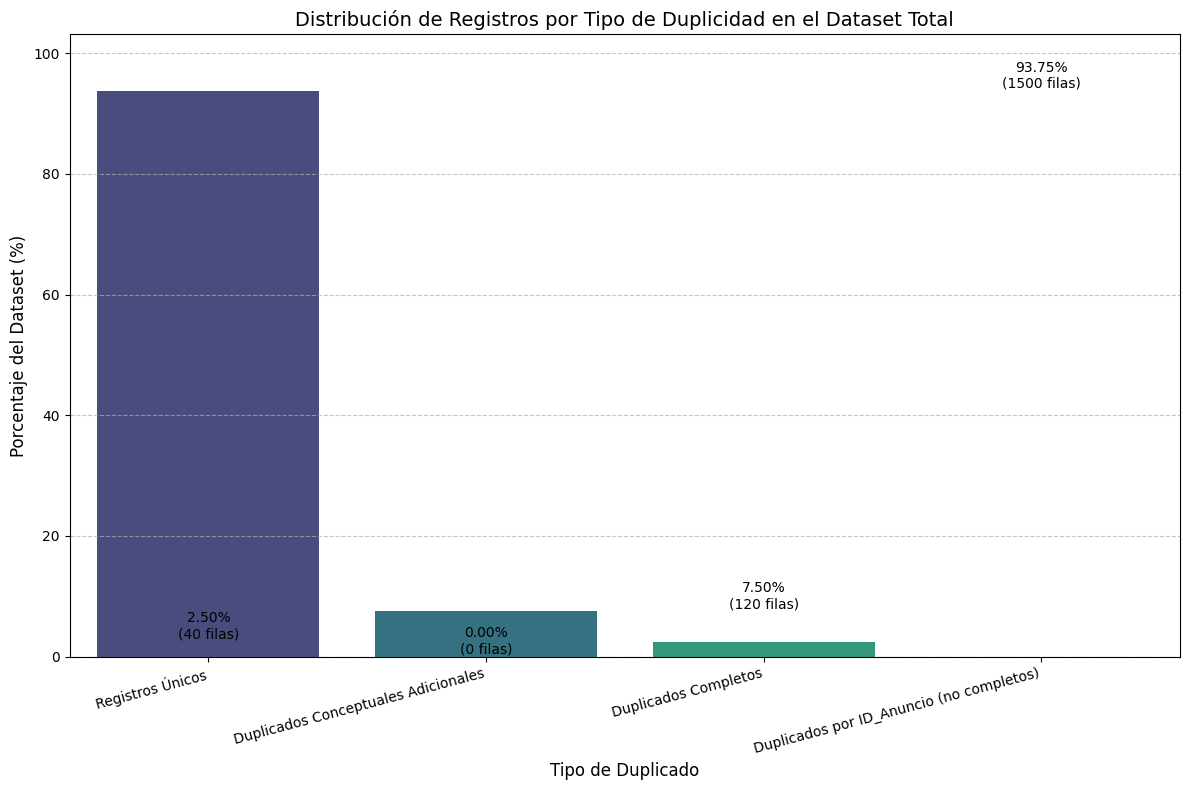

In [8]:
# --- VISUALIZACIÓN DE LOS TIPOS DE DUPLICIDAD EN EL DATASET ---
print(f'\n{"-"*10} VISUALIZACIÓN DE LOS TIPOS DE DUPLICIDAD EN EL DATASET {"-"*10}')

# Asegurarse de que total_filas_df esté definido
total_filas_df = len(df)

if total_filas_df > 0:
    # Recalculemos las cantidades de forma que sean disjuntas para el gráfico de barras:

    # Categoria 1: Duplicados Completos
    # Estos son los que df.duplicated() identifica (la segunda, tercera, etc., ocurrencia)
    count_duplicados_completos_plot = num_duplicados_completos

    # Categoria 2: Duplicados por ID_Anuncio (pero NO completos)
    # Estos son los duplicados de ID_Anuncio que tienen alguna diferencia,
    # y que, por lo tanto, no se habrían marcado como "completos".
    df_temp_sin_completo = df.drop_duplicates(keep='first') # df con solo una copia de cada duplicado completo
    count_id_duplicados_solo_id = df_temp_sin_completo.duplicated(subset=['ID_Anuncio']).sum()

    # Categoria 3: Duplicados Conceptuales (pero NO completos y NO de ID_Anuncio)
    # Este es exactamente num_duplicados_conceptuales_adicionales, que ya calculamos arriba
    count_duplicados_conceptuales_plot = num_duplicados_conceptuales_adicionales

    # Categoria 4: Registros Únicos (después de eliminar todos los tipos de duplicados)
    # Este es el total de filas que quedarían si se eliminaran todos los duplicados de las 3 categorías anteriores.
    df_simulacion_unica = df.copy()
    df_simulacion_unica.drop_duplicates(inplace=True) # Elimina completos
    if 'ID_Anuncio' in df_simulacion_unica.columns:
        df_simulacion_unica.drop_duplicates(subset=['ID_Anuncio'], inplace=True) # Elimina por ID (manteniendo 1)
    if len(columnas_existentes_conceptual) == len(columnas_clave_conceptual):
        df_simulacion_unica.drop_duplicates(subset=columnas_existentes_conceptual, inplace=True) # Elimina conceptuales

    count_registros_unicos = len(df_simulacion_unica)

    # Lista de categorías para la visualización
    tipos_duplicidad_plot = [
        'Duplicados Completos',
        'Duplicados por ID_Anuncio (no completos)',
        'Duplicados Conceptuales Adicionales',
        'Registros Únicos'
    ]
    cantidades_plot = [
        count_duplicados_completos_plot,
        count_id_duplicados_solo_id,
        count_duplicados_conceptuales_plot,
        count_registros_unicos
    ]

    # Calcular porcentajes
    porcentajes_plot = [(cantidad / total_filas_df * 100) for cantidad in cantidades_plot]

    df_plot_general = pd.DataFrame({
        'Tipo de Duplicado': tipos_duplicidad_plot,
        'Cantidad Absoluta': cantidades_plot,
        'Porcentaje del Dataset': porcentajes_plot
    })

    df_plot_general = df_plot_general.sort_values(by='Porcentaje del Dataset', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Tipo de Duplicado', y='Porcentaje del Dataset', data=df_plot_general, palette='viridis')

    for index, row in df_plot_general.iterrows():
        plt.text(index, row['Porcentaje del Dataset'],
                 f"{row['Porcentaje del Dataset']:.2f}%\n({row['Cantidad Absoluta']} filas)",
                 color='black', ha="center", va='bottom', fontsize=10)

    plt.title('Distribución de Registros por Tipo de Duplicidad en el Dataset Total', fontsize=14)
    plt.ylabel('Porcentaje del Dataset (%)', fontsize=12)
    plt.xlabel('Tipo de Duplicado', fontsize=12)
    plt.ylim(0, max(porcentajes_plot) * 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("\nNo se puede generar la gráfica de distribución: el DataFrame está vacío.")

### ***Análisis de Atipicidad*** <br>

***Breve resumen de hallazgos en describe()***

In [9]:
# Utilizaremos describe() con el fin de identificar valores númericos ilógicos (e.g., Area_m2=0, Ano_Construccion)
df.describe()

,ID_Anuncio,Precio_COP,Area_m2,Num_Habitaciones,Num_Banos,Ano_Construccion
count,1600.000000,1.567000e+03,1439.000000,1600.000000,1521.000000,1279.000000
mean,780.966875,1.061976e+09,194.318972,3.488125,2.565417,2002.456607
std,449.486103,5.223359e+08,86.258194,1.721689,1.080856,12.953913
min,1.000000,1.510000e+08,50.000000,1.000000,1.000000,1980.000000
25%,392.750000,6.385000e+08,120.000000,2.000000,2.000000,1991.500000
50%,783.500000,1.044000e+09,191.000000,3.000000,3.000000,2003.000000
75%,1169.250000,1.505500e+09,267.500000,5.000000,4.000000,2014.000000
max,1560.000000,2.000000e+09,350.000000,6.000000,4.000000,2024.000000


***Breve resumen de hallazgos en describe(include)***

In [10]:

# Utilizaremos describe() con el fin de identificar valores númericos ilógicos (e.g., Agencia, Fecha_Publicacion)
df.describe(include=['object'])

,Agencia,Fecha_Publicacion,Direccion,Ciudad
count,1600,1600,1600,1600
unique,5,688,1500,5
top,Conexión Urbana,2023-12-20,Avenida 51 # 5 - 18,Medellín
freq,335,8,3,354


 El dataset contiene una buena cantidad de anuncios con características diversas en términos de precio, área y número de habitaciones/baños. Sin embargo, la presencia de valores nulos en columnas clave como Area_m2, Num_Banos, Ano_Construccion y Precio_COP requerirá un manejo de datos faltantes. La existencia de ID_Anuncio duplicados también es un punto crítico.

## *Tratamiento y Limpieza (Cirugía de Datos)*

### ***Tratamiento de Datos Faltantes***

Aplicamos diferentes estrategias de imputación según el tipo de variable y el contexto de negocio.

In [ ]:
print(f'{"-"*10} ESTRATEGIAS DE IMPUTACIÓN {"-"*10}')
df_imputacion = df.copy()
log_imputacion = []

def registrar_imputacion(columna, metodo, valores_imputados, descripcion):
    log_imputacion.append({
        'Columna': columna,
        'Método': metodo,
        'Valores_Imputados': valores_imputados,
        'Descripción': descripcion
    })
    print(f"✅ Columna: '{columna}' - {valores_imputados} valores imputados usando {metodo}")
    print(f"   📝 {descripcion}")

# --- 1. Imputación de Precio_COP ---
if 'Precio_COP' in df_imputacion.columns:
    precio_faltante_antes = df_imputacion['Precio_COP'].isna().sum()

    if precio_faltante_antes > 0:
        print(f"\n⭐ Tratando 'Precio_COP' ({precio_faltante_antes} valores faltantes)")

        if 'Num_Habitaciones' in df_imputacion.columns:
            # Imputación principal: Mediana por Num_Habitaciones (vectorizado)
            imputacion_por_habitacion = df_imputacion.groupby('Num_Habitaciones')['Precio_COP'].transform('median')
            df_imputacion['Precio_COP'].fillna(imputacion_por_habitacion, inplace=True)

            # Recalcular nulos después de la primera pasada
            precio_faltante_despues_grupo = df_imputacion['Precio_COP'].isna().sum()
            valores_imputados_grupo = precio_faltante_antes - precio_faltante_despues_grupo

            # Registrar la primera imputación
            registrar_imputacion(
                'Precio_COP',
                'Mediana por Num_Habitaciones',
                valores_imputados_grupo,
                'Se imputó Precio_COP con la mediana debido a que esta métrica es más robusta frente a valores extremos o outliers en precios. \nLa media habría distorsionado los valores imputados si existieran propiedades con precios exageradamente altos o bajos.'
            )

            # Fallback: Si aún quedan nulos (ej. grupos sin datos válidos), imputar con mediana global
            if precio_faltante_despues_grupo > 0:
                mediana_precio_general = df_imputacion['Precio_COP'].median()
                df_imputacion['Precio_COP'].fillna(mediana_precio_general, inplace=True)
                registrar_imputacion(
                    'Precio_COP',
                    'Mediana Global (Fallback)',
                    precio_faltante_despues_grupo,
                    f'Se imputaron los restantes valores faltantes de Precio_COP con la mediana general: {mediana_precio_general:.1f} pesos.'
                )
        else:
            # Fallback si 'Num_Habitaciones' no existe
            mediana_precio_general = df_imputacion['Precio_COP'].median()
            df_imputacion['Precio_COP'].fillna(mediana_precio_general, inplace=True)
            registrar_imputacion(
                'Precio_COP',
                'Mediana Global',
                precio_faltante_antes,
                f'Imputación con la mediana general: {mediana_precio_general:.1f} pesos.'
            )
    else:
        print("\nNo hay valores faltantes en 'Precio_COP'. No se necesita imputación.")

# --- 2. Imputación de Area_m2 ---
if 'Area_m2' in df_imputacion.columns:
    area_m2_faltante_antes = df_imputacion['Area_m2'].isna().sum()

    if area_m2_faltante_antes > 0:
        print(f"\n⭐ Tratando 'Area_m2' ({area_m2_faltante_antes} valores faltantes)")

        # Estrategia principal: Imputación contextual con .apply()
        def imputar_area_m2_contextual(fila):
            if pd.isna(fila['Area_m2']):
                # Asegurarse de usar el nombre correcto de la columna
                num_habitaciones = fila['Num_Habitaciones'] if 'Num_Habitaciones' in fila and pd.notna(fila['Num_Habitaciones']) else None
                precio = fila['Precio_COP'] if 'Precio_COP' in fila and pd.notna(fila['Precio_COP']) else None

                if num_habitaciones is not None and precio is not None:
                    # Buscar propiedades similares (misma cantidad de habitaciones, precio similar)
                    # Usamos los datos ya potencialmente imputados de Precio_COP
                    precio_min, precio_max = precio * 0.8, precio * 1.2
                    productos_similares = df_imputacion[
                        (df_imputacion['Num_Habitaciones'] == num_habitaciones) &
                        (df_imputacion['Precio_COP'] >= precio_min) &
                        (df_imputacion['Precio_COP'] <= precio_max) &
                        (df_imputacion['Area_m2'].notna()) # Solo considerar valores no nulos para el promedio
                    ]

                    if len(productos_similares) >= 3: # Mínimo 3 productos para una mediana robusta
                        return productos_similares['Area_m2'].median()
                    else:
                        # Fallback 1: Mediana por Num_Habitaciones solamente
                        habitaciones_area = df_imputacion[
                            (df_imputacion['Num_Habitaciones'] == num_habitaciones) &
                            (df_imputacion['Area_m2'].notna())
                        ]
                        if len(habitaciones_area) > 0:
                            return habitaciones_area['Area_m2'].median()
                        else:
                            # Fallback 2: Mediana global de Area_m2 si no hay vecinos ni grupo válido
                            return df_imputacion['Area_m2'].median()
                else:
                    # Fallback 3: Mediana global si Num_Habitaciones o Precio_COP son NaN o no existen
                    return df_imputacion['Area_m2'].median()
            return fila['Area_m2']

        df_imputacion['Area_m2'] = df_imputacion.apply(imputar_area_m2_contextual, axis=1)
        area_m2_faltante_despues = df_imputacion['Area_m2'].isna().sum()
        valores_imputados = area_m2_faltante_antes - area_m2_faltante_despues

        registrar_imputacion(
            'Area_m2',
            'Contextual (Num_Habitaciones + Precio_COP)',
            valores_imputados,
            'Se imputó Area_m2 con la mediana. Esta estrategia minimiza la influencia de propiedades con áreas muy elevadas o inusuales, \ny refleja mejor la tendencia central de las áreas típicas en el conjunto de datos.'
        )
    else:
        print("\nNo hay valores faltantes en 'Area_m2'. No se necesita imputación.")

# --- 3. Imputación de Num_Banos ---
if 'Num_Banos' in df_imputacion.columns:
    num_banos_faltante_antes = df_imputacion['Num_Banos'].isna().sum()

    if num_banos_faltante_antes > 0:
        print(f"\n⭐ Tratando 'Num_Banos' ({num_banos_faltante_antes} valores faltantes)")

        if 'Num_Habitaciones' in df_imputacion.columns:
            # Imputación principal: Mediana por Num_Habitaciones
            imputacion_por_habitacion = df_imputacion.groupby('Num_Habitaciones')['Num_Banos'].transform('median')
            df_imputacion['Num_Banos'].fillna(imputacion_por_habitacion, inplace=True)

            num_banos_faltante_despues_grupo = df_imputacion['Num_Banos'].isna().sum()
            valores_imputados_grupo = num_banos_faltante_antes - num_banos_faltante_despues_grupo

            registrar_imputacion(
                'Num_Banos',
                'Mediana por Num_Habitaciones',
                valores_imputados_grupo,
                'Se imputó Num_Banos con la mediana por número de habitaciones. La mediana es robusta para conteos.'
            )

            # Fallback a mediana global
            if num_banos_faltante_despues_grupo > 0:
                mediana_banos_general = df_imputacion['Num_Banos'].median()
                df_imputacion['Num_Banos'].fillna(mediana_banos_general, inplace=True)
                registrar_imputacion(
                    'Num_Banos',
                    'Mediana Global (Fallback)',
                    num_banos_faltante_despues_grupo,
                    f'Se imputaron los restantes valores faltantes de Num_Banos con la mediana general: {mediana_banos_general:.0f}.'
                )
        else:
            # Fallback si 'Num_Habitaciones' no existe
            mediana_banos_general = df_imputacion['Num_Banos'].median()
            df_imputacion['Num_Banos'].fillna(mediana_banos_general, inplace=True)
            registrar_imputacion(
                'Num_Banos',
                'Mediana Global',
                num_banos_faltante_antes,
                f'Imputación con la mediana general: {mediana_banos_general:.0f}.'
            )
    else:
        print("\nNo hay valores faltantes en 'Num_Banos'. No se necesita imputación.")

# --- 4. Imputación de Ano_Construccion ---
if 'Ano_Construccion' in df_imputacion.columns:
    ano_construccion_faltante_antes = df_imputacion['Ano_Construccion'].isna().sum()

    if ano_construccion_faltante_antes > 0:
        print(f"\n⭐ Tratando 'Ano_Construccion' ({ano_construccion_faltante_antes} valores faltantes)")

        # Estrategia principal: Mediana por Ciudad (o por Num_Habitaciones si Ciudad tiene muchos nulos)
        if 'Ciudad' in df_imputacion.columns and df_imputacion['Ciudad'].notna().all(): # Asegurar que Ciudad no tiene nulos
            imputacion_por_ciudad = df_imputacion.groupby('Ciudad')['Ano_Construccion'].transform('mean')
            df_imputacion['Ano_Construccion'].fillna(imputacion_por_ciudad, inplace=True)

            ano_construccion_faltante_despues_grupo = df_imputacion['Ano_Construccion'].isna().sum()
            valores_imputados_grupo = ano_construccion_faltante_antes - ano_construccion_faltante_despues_grupo

            registrar_imputacion(
                'Ano_Construccion',
                'Media por Ciudad',
                valores_imputados_grupo,
                'Se imputó Ano_Construccion con la media por ciudad, ya que la antigüedad puede variar geográficamente.'
            )

            # Fallback a media global
            if ano_construccion_faltante_despues_grupo > 0:
                media_ano_general = df_imputacion['Ano_Construccion'].mean()
                df_imputacion['Ano_Construccion'].fillna(media_ano_general, inplace=True)
                registrar_imputacion(
                    'Ano_Construccion',
                    'Media Global (Fallback)',
                    ano_construccion_faltante_despues_grupo,
                    f'Se imputaron los restantes valores faltantes de Ano_Construccion con la media general: {media_ano_general:.0f}.'
                )
        else:
            # Fallback si 'Ciudad' no existe o tiene nulos
            media_ano_general = df_imputacion['Ano_Construccion'].mean()
            df_imputacion['Ano_Construccion'].fillna(media_ano_general, inplace=True)
            registrar_imputacion(
                'Ano_Construccion',
                'Mediana Global',
                ano_construccion_faltante_antes,
                f'Imputación con la media general: {media_ano_general:.0f}.'
            )
    else:
        print("\nNo hay valores faltantes en 'Ano_Construccion'. No se necesita imputación.")


print(f'\n{"-"*10} RESUMEN FINAL DE IMPUTACIÓN {"-"*10}')
print('\nConteo de valores nulos después de la imputación:')
print(df_imputacion.isna().sum())

if log_imputacion:
    print('\nLog detallado de operaciones de imputación:')
    display(pd.DataFrame(log_imputacion))
else:
    print('\nNo se realizaron operaciones de imputación.')

---------- ESTRATEGIAS DE IMPUTACIÓN ----------

⭐ Tratando 'Precio_COP' (33 valores faltantes)
✅ Columna: 'Precio_COP' - 33 valores imputados usando Mediana por Num_Habitaciones
   📝 Se imputó Precio_COP con la mediana debido a que esta métrica es más robusta frente a valores extremos o outliers en precios. 
La media habría distorsionado los valores imputados si existieran propiedades con precios exageradamente altos o bajos.

⭐ Tratando 'Area_m2' (161 valores faltantes)
✅ Columna: 'Area_m2' - 161 valores imputados usando Contextual (Num_Habitaciones + Precio_COP)
   📝 Se imputó Area_m2 con la mediana. Esta estrategia minimiza la influencia de propiedades con áreas muy elevadas o inusuales, 
y refleja mejor la tendencia central de las áreas típicas en el conjunto de datos.

⭐ Tratando 'Num_Banos' (79 valores faltantes)
✅ Columna: 'Num_Banos' - 79 valores imputados usando Mediana por Num_Habitaciones
   📝 Se imputó Num_Banos con la mediana por número de habitaciones. La mediana es robu

,Columna,Método,Valores_Imputados,Descripción
0,Precio_COP,Mediana por Num_Habitaciones,33,Se imputó Precio_COP con la mediana debido a q...
1,Area_m2,Contextual (Num_Habitaciones + Precio_COP),161,Se imputó Area_m2 con la mediana. Esta estrate...
2,Num_Banos,Mediana por Num_Habitaciones,79,Se imputó Num_Banos con la mediana por número ...
3,Ano_Construccion,Media por Ciudad,321,Se imputó Ano_Construccion con la media por ci...


### ***Tratamiento de Registros Duplicados***

Implementamos estrategias inteligentes para eliminar duplicados preservando la información más valiosa.

In [ ]:
print(f'{"-"*10} ELIMINACIÓN INTELIGENTE DE DUPLICADOS {"-"*10}')

# Crear copia para tratamiento de duplicados
df_sin_duplicados = df_imputacion.copy()
log_eliminacion = []
registros_iniciales = len(df_sin_duplicados)

# Función para registrar eliminaciones
def registrar_eliminacion(tipo, eliminados, descripcion):
    log_eliminacion.append({
        'Tipo': tipo,
        'Registros_Eliminados': eliminados,
        'Descripción': descripcion
    })
    print(f"✅ {tipo}: {eliminados} registros eliminados")
    print(f"   📝 {descripcion}")

# 1. Eliminar duplicados completos (filas idénticas en todas las columnas)
# Contar el número de filas que son duplicados (a partir de la segunda ocurrencia)
duplicados_completos_antes_elim = df_sin_duplicados.duplicated().sum()

if duplicados_completos_antes_elim > 0:
    print(f'\n Eliminando duplicados completos ({duplicados_completos_antes_elim} encontrados)')

    # Mostrar ejemplos antes de eliminar
    print(" Ejemplos de registros duplicados completos (antes de eliminar):")
    # Usar .head(10) para más ejemplos si hay muchos. keep=False muestra todas las copias.
    ejemplos_duplicados = df_sin_duplicados[df_sin_duplicados.duplicated(keep=False)].head(10)

    if not ejemplos_duplicados.empty:
        display(ejemplos_duplicados[['ID_Anuncio', 'Direccion', 'Ciudad', 'Precio_COP', 'Fecha_Publicacion', 'Agencia']])
    else:
        print("   (No se encontraron ejemplos de duplicados completos para mostrar en el head)")

    # Eliminar duplicados manteniendo el primero
    df_sin_duplicados_temp = df_sin_duplicados.drop_duplicates(keep='first').copy()

    # El número real de filas eliminadas es la diferencia
    eliminados_completos_count = len(df_sin_duplicados) - len(df_sin_duplicados_temp)
    df_sin_duplicados = df_sin_duplicados_temp # Actualizar el df principal

    registrar_eliminacion(
        'Duplicados Completos',
        eliminados_completos_count,
        'Registros idénticos en todas las columnas - mantenido el primero.'
    )
else:
    print("\nNo se encontraron duplicados completos. El DataFrame se mantiene igual.")

# 2. Resolver IDs de Anuncio duplicados (crítico para unicidad del anuncio)
if 'ID_Anuncio' in df_sin_duplicados.columns:
    # Contar cuántos ID_Anuncio tienen duplicados DESPUÉS de eliminar los duplicados completos
    # duplicated(subset=['ID_Anuncio']).sum() cuenta las ocurrencias *adicionales* de un ID_Anuncio.
    ids_duplicados_antes_elim = df_sin_duplicados.duplicated(subset=['ID_Anuncio']).sum()

    if ids_duplicados_antes_elim > 0:
        print(f"\n Resolviendo IDs de Anuncio duplicados ({ids_duplicados_antes_elim} encontrados)")
        print("   (Estos son ID_Anuncio que se repiten, pero sus filas NO son idénticas en todas las columnas)")

        # Mostrar ejemplos de IDs de Anuncio duplicados con diferencias
        # Filtra solo los ID_Anuncio que tienen duplicados y muestra todas sus ocurrencias
        duplicados_id_mask_pre_elim = df_sin_duplicados.duplicated(subset=['ID_Anuncio'], keep=False)
        ejemplos_ids_duplicados = df_sin_duplicados[duplicados_id_mask_pre_elim].sort_values('ID_Anuncio').head(10)

        if not ejemplos_ids_duplicados.empty:
            print("📋 Ejemplos de ID_Anuncio duplicados (con posibles diferencias):")
            display(ejemplos_ids_duplicados[['ID_Anuncio', 'Fecha_Publicacion', 'Precio_COP', 'Area_m2', 'Direccion', 'Agencia']])
        else:
            print("   (No se encontraron ejemplos de ID_Anuncio duplicados para mostrar después de la limpieza completa)")

        # Si el ID_Anuncio se repite pero las filas son diferentes,
        # ¿cuál mantener? Una estrategia común es mantener el más reciente por 'Fecha_Publicacion'.
        if 'Fecha_Publicacion' in df_sin_duplicados.columns:
            # Asegurarse de que 'Fecha_Publicacion' es datetime para ordenar correctamente
            df_sin_duplicados['Fecha_Publicacion'] = pd.to_datetime(df_sin_duplicados['Fecha_Publicacion'], errors='coerce')

            # Ordenar para que el registro más reciente (o "mejor" si hay otro criterio) quede primero
            # Usamos una copia temporal para evitar SettingWithCopyWarning en cadenas de asignación
            temp_df = df_sin_duplicados.sort_values(by=['ID_Anuncio', 'Fecha_Publicacion'], ascending=[True, False]).copy()

            # Eliminar duplicados de ID_Anuncio, manteniendo el primero (que ahora es el más reciente por ID)
            df_sin_duplicados_temp_ids = temp_df.drop_duplicates(subset=['ID_Anuncio'], keep='first').copy()

            # El número real de filas eliminadas por ID_Anuncio es la diferencia
            eliminados_ids_count = len(df_sin_duplicados) - len(df_sin_duplicados_temp_ids)
            df_sin_duplicados = df_sin_duplicados_temp_ids # Actualizar el df principal

            registrar_eliminacion(
                'IDs de Anuncio Duplicados',
                eliminados_ids_count,
                'Cada ID_Anuncio debe ser único - mantenido el registro más reciente por Fecha_Publicacion.'
            )
        else:
            # Sin Fecha_Publicacion, mantener el primero (o el de más información)
            print("   No se encontró 'Fecha_Publicacion'. Se mantendrá el primer registro por 'ID_Anuncio'.")
            df_sin_duplicados_temp_ids = df_sin_duplicados.drop_duplicates(subset=['ID_Anuncio'], keep='first').copy()

            eliminados_ids_count = len(df_sin_duplicados) - len(df_sin_duplicados_temp_ids)
            df_sin_duplicados = df_sin_duplicados_temp_ids

            registrar_eliminacion(
                'IDs de Anuncio Duplicados',
                eliminados_ids_count,
                'Cada ID_Anuncio debe ser único - mantenido el primer registro.'
            )
    else:
        print("\nNo se encontraron IDs de Anuncio duplicados restantes después de la limpieza completa.")
else:
    print('La columna "ID_Anuncio" no se encontró en el DataFrame.')

# 3. Manejar duplicados conceptuales (mismo anuncio pero sin un ID_Anuncio claro, o errores de entrada)
columnas_conceptuales_anuncio = ['Direccion', 'Ciudad', 'Num_Habitaciones']
columnas_existentes = [col for col in columnas_conceptuales_anuncio if col in df_sin_duplicados.columns]

if len(columnas_existentes) == len(columnas_conceptuales_anuncio): # Asegurar que todas las columnas clave conceptuales existan
    # Contar cuántos duplicados conceptuales hay DESPUÉS de eliminar los duplicados completos y por ID
    duplicados_conceptuales_antes_elim = df_sin_duplicados.duplicated(subset=columnas_existentes).sum()

    if duplicados_conceptuales_antes_elim > 0:
        print(f"\n Resolviendo duplicados conceptuales de anuncios ({duplicados_conceptuales_antes_elim} encontrados)")
        print(f"   Criterio: {', '.join(columnas_existentes)}")

        # Mostrar ejemplos de duplicados conceptuales antes de eliminar
        duplicados_conceptual_mask_pre_elim = df_sin_duplicados.duplicated(subset=columnas_existentes, keep=False)
        ejemplos_conceptuales = df_sin_duplicados[duplicados_conceptual_mask_pre_elim].sort_values(by=columnas_existentes).head(10)
        if not ejemplos_conceptuales.empty:
            print("📋 Ejemplos de duplicados conceptuales (con posibles diferencias en ID o otros datos):")
            display(ejemplos_conceptuales[['ID_Anuncio', 'Direccion', 'Ciudad', 'Num_Habitaciones', 'Precio_COP', 'Area_m2', 'Fecha_Publicacion']])
        else:
            print("   (No se encontraron ejemplos de duplicados conceptuales para mostrar)")

        # Mantener el registro con el precio más alto o más completo (menos nulos)
        if 'Precio_COP' in df_sin_duplicados.columns and 'Area_m2' in df_sin_duplicados.columns:
            # Contar nulos por fila para ordenar
            df_sin_duplicados['_temp_nulos'] = df_sin_duplicados.isnull().sum(axis=1)

            temp_df = df_sin_duplicados.sort_values(
                by=['_temp_nulos', 'Precio_COP', 'Area_m2'],
                ascending=[True, False, False] # Menos nulos, mayor precio, mayor área
            ).copy() # Añadir .copy() aquí

            df_sin_duplicados_temp_conceptual = temp_df.drop_duplicates(subset=columnas_existentes, keep='first').copy()
            df_sin_duplicados_temp_conceptual = df_sin_duplicados_temp_conceptual.drop('_temp_nulos', axis=1)

            eliminados_conceptuales_count = len(df_sin_duplicados) - len(df_sin_duplicados_temp_conceptual)
            df_sin_duplicados = df_sin_duplicados_temp_conceptual

            registrar_eliminacion(
                'Duplicados Conceptuales (Anuncios)',
                eliminados_conceptuales_count,
                'Misma dirección/ciudad/habitaciones - mantenido el más completo y/o de mayor valor.'
            )
        else:
            # Sin información de valor/completitud, mantener el primero
            print("   No hay 'Precio_COP' o 'Area_m2' para una selección sofisticada. Se mantendrá el primer registro.")
            df_sin_duplicados_temp_conceptual = df_sin_duplicados.drop_duplicates(subset=columnas_existentes, keep='first').copy()

            eliminados_conceptuales_count = len(df_sin_duplicados) - len(df_sin_duplicados_temp_conceptual)
            df_sin_duplicados = df_sin_duplicados_temp_conceptual

            registrar_eliminacion(
                'Duplicados Conceptuales (Anuncios)',
                eliminados_conceptuales_count,
                'Misma dirección/ciudad/habitaciones - mantenido el primer registro.'
            )
    else:
        print("\nNo se encontraron duplicados conceptuales de anuncios.")
else:
    print(f"\nNo hay suficientes columnas clave ({', '.join(columnas_conceptuales_anuncio)}) para buscar duplicados conceptuales.")

# Mostrar resumen de eliminaciones
registros_finales = len(df_sin_duplicados)
total_eliminados = registros_iniciales - registros_finales

print(f"\n RESUMEN FINAL DE ELIMINACIONES:")
if log_eliminacion:
    df_log_elim = pd.DataFrame(log_eliminacion)
    display(df_log_elim)

print(f"\n IMPACTO TOTAL:")
print(f"   • Registros iniciales: {registros_iniciales:,}")
print(f"   • Registros finales: {registros_finales:,}")
print(f"   • Total eliminados: {total_eliminados:,}")
if registros_iniciales > 0:
    print(f"   • Porcentaje de retención: {(registros_finales/registros_iniciales*100):.1f}%")
else:
    print("   • El dataset inicial estaba vacío.")

if total_eliminados == 0:
    print("\n✅ No se encontraron duplicados para eliminar en ninguna etapa.")

---------- ELIMINACIÓN INTELIGENTE DE DUPLICADOS ----------

 Eliminando duplicados completos (40 encontrados)
 Ejemplos de registros duplicados completos (antes de eliminar):


,ID_Anuncio,Direccion,Ciudad,Precio_COP,Fecha_Publicacion,Agencia
19,859,Avenida 132 # 41 - 81,Medellín,7.900000e+08,2024-08-11,Horizonte Propiedades
29,1272,Transversal 41 # 33 - 76,Cali,1.817000e+09,2024-04-22,Tu Casa Ideal
50,502,Avenida 114 # 87 - 57,Bogotá D.C.,1.306000e+09,2024-05-17,Propiedades del Sol
52,296,Carrera 139 # 57 - 93,Cali,1.564000e+09,2024-11-19,Propiedades del Sol
56,938,Carrera 94 # 36 - 6,Barranquilla,4.350000e+08,2024-02-16,Conexión Urbana
61,648,Calle 134 # 73 - 1,Bogotá D.C.,6.010000e+08,2023-08-26,Inmobiliaria Andina
64,905,Avenida 127 # 81 - 89,Bogotá D.C.,8.540000e+08,2024-11-28,Inmobiliaria Andina
65,553,Calle 78 # 7 - 91,Cali,1.918000e+09,2024-10-25,Propiedades del Sol
83,502,Avenida 114 # 87 - 57,Bogotá D.C.,1.306000e+09,2024-05-17,Propiedades del Sol
95,1061,Avenida 30 # 17 - 64,Barranquilla,8.050000e+08,2025-02-16,Conexión Urbana


✅ Duplicados Completos: 40 registros eliminados
   📝 Registros idénticos en todas las columnas - mantenido el primero.

No se encontraron IDs de Anuncio duplicados restantes después de la limpieza completa.

 Resolviendo duplicados conceptuales de anuncios (60 encontrados)
   Criterio: Direccion, Ciudad, Num_Habitaciones
📋 Ejemplos de duplicados conceptuales (con posibles diferencias en ID o otros datos):


,ID_Anuncio,Direccion,Ciudad,Num_Habitaciones,Precio_COP,Area_m2,Fecha_Publicacion
1081,1550,Avenida 12 # 1 - 42,Bogotá D.C.,6,1.737000e+09,193.0,2025-05-03 00:00:00
1309,730,Avenida 12 # 1 - 42,Bogotá D.C.,6,1.737000e+09,193.0,2025-04-28
25,1531,Avenida 120 # 87 - 17,Medellín,6,1.327000e+09,60.0,2023-12-28 00:00:00
818,1268,Avenida 120 # 87 - 17,Medellín,6,1.327000e+09,60.0,2023-12-20
95,1061,Avenida 30 # 17 - 64,Barranquilla,4,8.050000e+08,315.0,2025-02-16
1034,1525,Avenida 30 # 17 - 64,Barranquilla,4,8.050000e+08,315.0,2025-02-17 00:00:00
821,1555,Avenida 31 # 13 - 23,Barranquilla,3,3.700000e+08,340.0,2025-04-02 00:00:00
1211,377,Avenida 31 # 13 - 23,Barranquilla,3,3.700000e+08,340.0,2025-03-27
893,175,Avenida 37 # 58 - 38,Cartagena,3,7.280000e+08,312.0,2023-10-19
1247,1514,Avenida 37 # 58 - 38,Cartagena,3,7.280000e+08,312.0,2023-10-23 00:00:00


✅ Duplicados Conceptuales (Anuncios): 60 registros eliminados
   📝 Misma dirección/ciudad/habitaciones - mantenido el más completo y/o de mayor valor.

 RESUMEN FINAL DE ELIMINACIONES:


,Tipo,Registros_Eliminados,Descripción
0,Duplicados Completos,40,Registros idénticos en todas las columnas - ma...
1,Duplicados Conceptuales (Anuncios),60,Misma dirección/ciudad/habitaciones - mantenid...



 IMPACTO TOTAL:
   • Registros iniciales: 1,600
   • Registros finales: 1,500
   • Total eliminados: 100
   • Porcentaje de retención: 93.8%


### ***Corrección de Tipos: astype().***

In [ ]:
print(f'\n{"-"*10} CORRECCIÓN DE TIPOS DE DATOS EN df_imputacion (astype()) {"-"*10}')

# --- Aplicar astype() con manejo de errores y limpieza previa si es necesario ---

# ID_Anuncio: De string a Int64 (nullable integer)
# Ya se hizo una primera conversión en el bloque de "Corrección Inicial de Tipos para Imputación"
# Pero aquí nos aseguramos de que sea Int64 si no lo es o si los nulos introducidos por 'coerce' necesitan este tipo.
if 'ID_Anuncio' in df_imputacion.columns:
    df_imputacion['ID_Anuncio'] = pd.to_numeric(df_imputacion['ID_Anuncio'], errors='coerce').astype('Int64')
    print("✅ 'ID_Anuncio' finalizado a Int64 (nullable integer).")
else:
    print("ℹ️  Columna 'ID_Anuncio' no encontrada.")


# Fecha_Publicacion: De mixed a datetime.
# Ya se hizo en la etapa de "Corrección Inicial de Tipos para Imputación".
# Esta línea actúa como una re-confirmación/limpieza de cualquier valor residual no convertible.
if 'Fecha_Publicacion' in df_imputacion.columns:
    df_imputacion['Fecha_Publicacion'] = pd.to_datetime(df_imputacion['Fecha_Publicacion'], errors='coerce')
    if df_imputacion['Fecha_Publicacion'].isnull().sum() > 0:
        print(f"⚠️ 'Fecha_Publicacion' tiene {df_imputacion['Fecha_Publicacion'].isnull().sum()} valores no convertibles a fecha después de imputación, se han convertido a NaT.")
    else:
        print("✅ 'Fecha_Publicacion' re-confirmado a datetime.")
else:
    print("ℹ️ Columna 'Fecha_Publicacion' no encontrada.")

# Precio_COP: De numérico (float) a un tipo adecuado si es necesario (ej. mantener float64 o convertir a Int64 si no hay decimales relevantes)
# Ya fue convertido a float64 en la etapa de "Corrección Inicial de Tipos para Imputación"
# y imputado. Generalmente, float64 es el tipo adecuado para precios.
if 'Precio_COP' in df_imputacion.columns:
    if df_imputacion['Precio_COP'].dtype != 'float64':
        try:
            df_imputacion['Precio_COP'] = df_imputacion['Precio_COP'].astype('float64')
            print("✅ 'Precio_COP' confirmado a float64.")
        except Exception as e:
            print(f"❌ Error al confirmar 'Precio_COP' a float64: {e}")
    else:
        print("✅ 'Precio_COP' ya es float64.")
else:
    print("ℹ️ Columna 'Precio_COP' no encontrada.")

# Area_m2: De numérico (float) a float64
# Similar a Precio_COP, ya debería ser float64.
if 'Area_m2' in df_imputacion.columns:
    if df_imputacion['Area_m2'].dtype != 'float64':
        try:
            df_imputacion['Area_m2'] = df_imputacion['Area_m2'].astype('float64')
            print("✅ 'Area_m2' confirmado a float64.")
        except Exception as e:
            print(f"❌ Error al confirmar 'Area_m2' a float64: {e}")
    else:
        print("✅ 'Area_m2' ya es float64.")
else:
    print("ℹ️ Columna 'Area_m2' no encontrada.")

# Num_Habitaciones: De numérico (float/Int64) a Int64
# Redondear antes de convertir a Int64 para manejar decimales de la imputación.
if 'Num_Habitaciones' in df_imputacion.columns:
    # Convertir a float primero para manejar nulos y luego redondear
    df_imputacion['Num_Habitaciones'] = pd.to_numeric(df_imputacion['Num_Habitaciones'], errors='coerce')
    # Redondear a un número entero
    df_imputacion['Num_Habitaciones'] = df_imputacion['Num_Habitaciones'].round(0)
    # Finalmente, convertir a Int64 para soportar nulos si los hay
    df_imputacion['Num_Habitaciones'] = df_imputacion['Num_Habitaciones'].astype('Int64')
    print("✅ 'Num_Habitaciones' finalizado a Int64 (redondeado y soporta nulos).")
else:
    print("ℹ️ Columna 'Num_Habitaciones' no encontrada.")

# Num_Banos: De numérico (float/Int64) a Int64
# Redondear antes de convertir a Int64.
if 'Num_Banos' in df_imputacion.columns:
    df_imputacion['Num_Banos'] = pd.to_numeric(df_imputacion['Num_Banos'], errors='coerce')
    df_imputacion['Num_Banos'] = df_imputacion['Num_Banos'].round(0)
    df_imputacion['Num_Banos'] = df_imputacion['Num_Banos'].astype('Int64')
    print("✅ 'Num_Banos' finalizado a Int64.")
else:
    print("ℹ️ Columna 'Num_Banos' no encontrada.")

# Ano_Construccion: De numérico (float/Int64) a Int64
# Redondear antes de convertir a Int64.
if 'Ano_Construccion' in df_imputacion.columns:
    df_imputacion['Ano_Construccion'] = pd.to_numeric(df_imputacion['Ano_Construccion'], errors='coerce')
    # Redondear el año a un número entero
    df_imputacion['Ano_Construccion'] = df_imputacion['Ano_Construccion'].round(0)
    df_imputacion['Ano_Construccion'] = df_imputacion['Ano_Construccion'].astype('Int64')
    print("✅ 'Ano_Construccion' finalizado a Int64 (redondeado).")
else:
    print("ℹ️ Columna 'Ano_Construccion' no encontrada.")

# Ciudad: a 'category'
if 'Ciudad' in df_imputacion.columns:
    df_imputacion['Ciudad'] = df_imputacion['Ciudad'].astype('category')
    print("✅ 'Ciudad' convertido a tipo 'category'.")
else:
    print("ℹ️ Columna 'Ciudad' no encontrada.")

# Agencia: a 'category'
if 'Agencia' in df_imputacion.columns:
    df_imputacion['Agencia'] = df_imputacion['Agencia'].astype('category')
    print("✅ 'Agencia' convertido a tipo 'category'.")
else:
    print("ℹ️ Columna 'Agencia' no encontrada.")

# Direccion: a 'string' (Pandas StringDtype para manejo de strings y nulos de forma más eficiente)
if 'Direccion' in df_imputacion.columns:
    df_imputacion['Direccion'] = df_imputacion['Direccion'].astype(pd.StringDtype())
    print("✅ 'Direccion' convertido a tipo 'string' (StringDtype).")
else:
    print("ℹ️ Columna 'Direccion' no encontrada.")

print("\n--- DataFrame df_imputacion DESPUÉS de la Corrección Final de Tipos ---")
print(df_imputacion.info())
print("\nDataFrame df_imputacion con tipos corregidos (primeras filas):")
print(df_imputacion.head())


---------- CORRECCIÓN DE TIPOS DE DATOS EN df_imputacion (astype()) ----------
✅ 'ID_Anuncio' finalizado a Int64 (nullable integer).
⚠️ 'Fecha_Publicacion' tiene 60 valores no convertibles a fecha después de imputación, se han convertido a NaT.
✅ 'Precio_COP' ya es float64.
✅ 'Area_m2' ya es float64.
✅ 'Num_Habitaciones' finalizado a Int64 (redondeado y soporta nulos).
✅ 'Num_Banos' finalizado a Int64.
✅ 'Ano_Construccion' finalizado a Int64 (redondeado).
✅ 'Ciudad' convertido a tipo 'category'.
✅ 'Agencia' convertido a tipo 'category'.
✅ 'Direccion' convertido a tipo 'string' (StringDtype).

--- DataFrame df_imputacion DESPUÉS de la Corrección Final de Tipos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Anuncio         1600 non-null   Int64         
 1   Agencia            1600 non-null   category      


## ***Validación y Exportación***

### ***Validación de Calidad Post-Limpieza***

Verificamos que nuestras operaciones de limpieza fueron exitosas y no introdujeron nuevos problemas.

In [14]:
print("=== VALIDACIÓN DE CALIDAD POST-LIMPIEZA ===")

# Dataset final limpio
df_final = df_sin_duplicados.copy()

# 1. Validación de integridad estructural
print("\n🏗️ VALIDACIÓN DE INTEGRIDAD ESTRUCTURAL")

# Verificar columnas
columnas_originales = df.columns.tolist() # Obtener las columnas del DataFrame original
columnas_perdidas = set(columnas_originales) - set(df_final.columns)
columnas_nuevas = set(df_final.columns) - set(columnas_originales)

if columnas_perdidas:
    print(f"⚠️ Columnas perdidas: {', '.join(columnas_perdidas)}")
else:
    print("✅ Todas las columnas originales preservadas")

if columnas_nuevas:
    print(f"ℹ️ Columnas nuevas: {', '.join(columnas_nuevas)}")

# Verificar tipos de datos
cambios_tipo = {}
for col in columnas_originales: # Iterar sobre las columnas originales para la comparación
    if col in df_final.columns:
        tipo_original = str(df[col].dtype)
        tipo_final = str(df_final[col].dtype)
        if tipo_original != tipo_final:
            cambios_tipo[col] = {'original': tipo_original, 'final': tipo_final}

if cambios_tipo:
    print(f"⚠️ Cambios en tipos de datos:")
    for col, tipos in cambios_tipo.items():
        print(f"   {col}: {tipos['original']} → {tipos['final']}")
else:
    print("✅ Tipos de datos preservados (o cambios esperados por imputación/limpieza)") # Ajustado el mensaje

# 2. Validación de completitud
print(f"\n📊 VALIDACIÓN DE COMPLETITUD")

# Calcular scores de completitud
total_celdas_original = len(df) * len(df.columns)
total_celdas_final = len(df_final) * len(df_final.columns)

nulos_totales_original = df.isnull().sum().sum()
nulos_totales_final = df_final.isnull().sum().sum()

# Manejar el caso de división por cero si el DataFrame está vacío
completitud_original = (1 - nulos_totales_original / total_celdas_original) * 100 if total_celdas_original > 0 else 0
completitud_final = (1 - nulos_totales_final / total_celdas_final) * 100 if total_celdas_final > 0 else 0


print(f"📈 Score de completitud:")
print(f"   • Original (df): {completitud_original:.1f}%")
print(f"   • Final (df_sin_duplicados): {completitud_final:.1f}%")
print(f"   • Mejora: {completitud_final - completitud_original:+.1f} puntos")

# 3. Validación de unicidad
print(f"\n🔑 VALIDACIÓN DE UNICIDAD")

# Verificar ID_Anuncio únicos (es tu identificador principal ahora)
duplicados_id = 0 # Inicializar
if 'ID_Anuncio' in df_final.columns:
    duplicados_id = df_final.duplicated(subset=['ID_Anuncio']).sum()
    if duplicados_id > 0:
        print(f"✗ ID_Anuncio: {duplicados_id} duplicados encontrados (CRÍTICO)")
        print("   Ejemplos de ID_Anuncio duplicados en df_final:")
        display(df_final[df_final.duplicated(subset=['ID_Anuncio'], keep=False)][['ID_Anuncio', 'Direccion', 'Ciudad', 'Precio_COP']].head())
    else:
        print(f"✅ ID_Anuncio: Completamente único")
else:
    print("⚠️ La columna 'ID_Anuncio' no se encontró en el DataFrame final.")


# Verificar duplicados completos (deberían ser 0 después de tu limpieza)
duplicados_completos_final = df_final.duplicated().sum()
if duplicados_completos_final > 0:
    print(f"✗ Duplicados completos: {duplicados_completos_final} encontrados")
    print("   Ejemplos de duplicados completos en df_final:")
    display(df_final[df_final.duplicated(keep=False)][['ID_Anuncio', 'Direccion', 'Ciudad', 'Precio_COP']].head())
else:
    print(f"✅ No hay duplicados completos")

# Verificar duplicados conceptuales restantes (si es un criterio importante y no se eliminaron todos)
columnas_conceptuales_anuncio = ['Direccion', 'Ciudad', 'Num_Habitaciones']
duplicados_conceptuales_final = 0
if all(col in df_final.columns for col in columnas_conceptuales_anuncio):
    duplicados_conceptuales_final = df_final.duplicated(subset=columnas_conceptuales_anuncio).sum()
    if duplicados_conceptuales_final > 0:
        print(f"⚠️ Duplicados conceptuales restantes (Direccion, Ciudad, Num_Habitaciones): {duplicados_conceptuales_final} encontrados")
        print("   Ejemplos de duplicados conceptuales en df_final:")
        display(df_final[df_final.duplicated(subset=columnas_conceptuales_anuncio, keep=False)][['ID_Anuncio', 'Direccion', 'Ciudad', 'Num_Habitaciones', 'Precio_COP']].head())
    else:
        print(f"✅ No hay duplicados conceptuales restantes (según '{', '.join(columnas_conceptuales_anuncio)}')")
else:
    print(f"ℹ️ No se pueden verificar duplicados conceptuales: faltan una o más columnas ({', '.join(columnas_conceptuales_anuncio)})")


# 4. Validación de consistencia lógica
print(f"\n🧠 VALIDACIÓN DE CONSISTENCIA LÓGICA")

inconsistencias = []
current_year = pd.Timestamp.now().year # Obtener el año actual para validar años de construcción

# Validar rangos numéricos y valores lógicos para columnas de anuncios inmobiliarios
if 'Precio_COP' in df_final.columns:
    precios_invalidos = (df_final['Precio_COP'] <= 0).sum()
    precios_sospechosamente_bajos = ((df_final['Precio_COP'] > 0) & (df_final['Precio_COP'] < 50_000_000)).sum() # Ej: < 50 millones COP
    precios_sospechosamente_altos = (df_final['Precio_COP'] > 5_000_000_000).sum() # Ej: > 5 mil millones COP

    if precios_invalidos > 0:
        inconsistencias.append(f"Precios no positivos (<=0): {precios_invalidos}")
    if precios_sospechosamente_bajos > 0:
        inconsistencias.append(f"Precios sospechosamente bajos (<50M COP): {precios_sospechosamente_bajos}")
    if precios_sospechosamente_altos > 0:
        inconsistencias.append(f"Precios sospechosamente altos (>5B COP): {precios_sospechosamente_altos}")

if 'Area_m2' in df_final.columns:
    areas_invalidas = (df_final['Area_m2'] <= 0).sum()
    areas_sospechosamente_grandes = (df_final['Area_m2'] > 1000).sum() # Ej: > 1000 m2
    if areas_invalidas > 0:
        inconsistencias.append(f"Áreas no positivas (<=0 m2): {areas_invalidas}")
    if areas_sospechosamente_grandes > 0:
        inconsistencias.append(f"Áreas sospechosamente grandes (>1000 m2): {areas_sospechosamente_grandes}")


if 'Num_Habitaciones' in df_final.columns:
    hab_invalidas = ((df_final['Num_Habitaciones'] <= 0) | (df_final['Num_Habitaciones'] > 10)).sum() # Ej: 0 o más de 10
    if hab_invalidas > 0:
        inconsistencias.append(f"Número de habitaciones inválido (<=0 o >10): {hab_invalidas}")

if 'Num_Banos' in df_final.columns:
    banos_invalidos = ((df_final['Num_Banos'] < 0) | (df_final['Num_Banos'] > 8)).sum() # Ej: Negativo o más de 8
    if banos_invalidos > 0:
        inconsistencias.append(f"Número de baños inválido (<0 o >8): {banos_invalidos}")

if 'Ano_Construccion' in df_final.columns:
    # Convertir a int si es posible para comparar, ignorando nulos
    temp_anios = df_final['Ano_Construccion'].dropna().astype(int)
    anios_futuros = (temp_anios > current_year).sum()
    anios_demasiado_antiguos = (temp_anios < 1900).sum() # Ej: antes de 1900
    if anios_futuros > 0:
        inconsistencias.append(f"Año de construcción en el futuro: {anios_futuros}")
    if anios_demasiado_antiguos > 0:
        inconsistencias.append(f"Año de construcción demasiado antiguo (<1900): {anios_demasiado_antiguos}")

# Validar consistencia entre habitaciones y baños (ejemplo: no más baños que habitaciones para propiedades pequeñas)
if 'Num_Habitaciones' in df_final.columns and 'Num_Banos' in df_final.columns:
    inconsistencia_hab_banos = ((df_final['Num_Banos'] > df_final['Num_Habitaciones']) & (df_final['Num_Habitaciones'] < 3)).sum()
    if inconsistencia_hab_banos > 0:
        inconsistencias.append(f"Más baños que habitaciones en propiedades pequeñas (<3 hab): {inconsistencia_hab_banos}")


if inconsistencias:
    print("⚠️ Inconsistencias detectadas:")
    for inconsistencia in inconsistencias:
        print(f"   - {inconsistencia}")
else:
    print("✅ No se detectaron inconsistencias lógicas significativas")

# 5. Score general de calidad
print(f"\n🏆 SCORE GENERAL DE CALIDAD")

score_calidad = 100

# Penalizaciones (ajustadas a tu contexto)
# Penalización fuerte si ID_Anuncio no es único
if duplicados_id > 0:
    score_calidad -= 40 # Crítico
# Penalización si hay duplicados completos restantes (deberían ser 0)
if duplicados_completos_final > 0:
    score_calidad -= 25
# Penalización si hay duplicados conceptuales restantes (menos crítico que ID o completo)
if duplicados_conceptuales_final > 0:
    score_calidad -= 15

# Penalización por columnas perdidas (si no es intencional)
if columnas_perdidas:
    score_calidad -= 10
# Penalización por cambios inesperados en tipos de datos
if cambios_tipo:
    score_calidad -= len(cambios_tipo) * 3

# Penalización por inconsistencias lógicas
if inconsistencias:
    score_calidad -= len(inconsistencias) * 5 # Cada tipo de inconsistencia resta puntos

# Bonificaciones (ajustadas)
# Bonificación por una mejora significativa en la completitud
if completitud_final > completitud_original:
    mejora_puntos = completitud_final - completitud_original
    if mejora_puntos > 5: # Si mejora más de 5 puntos porcentuales
        score_calidad += 5
    if mejora_puntos > 10: # Si mejora más de 10 puntos porcentuales
        score_calidad += 5 # Bonificación adicional

score_calidad = max(0, min(100, score_calidad)) # Asegura que el score esté entre 0 y 100

if score_calidad >= 90:
    estado = "🌟 EXCELENTE"
    recomendacion = "Dataset listo para análisis de producción"
elif score_calidad >= 80:
    estado = "✅ BUENA"
    recomendacion = "Dataset aceptable con monitoreo recomendado"
elif score_calidad >= 70:
    estado = "⚠️ ACEPTABLE"
    recomendacion = "Requiere mejoras menores antes de producción"
else:
    estado = "❌ PROBLEMÁTICA"
    recomendacion = "Requiere revisión significativa"

print(f"📊 Score de Calidad: {score_calidad}/100")
print(f"🎯 Estado: {estado}")
print(f"💡 Recomendación: {recomendacion}")

=== VALIDACIÓN DE CALIDAD POST-LIMPIEZA ===

🏗️ VALIDACIÓN DE INTEGRIDAD ESTRUCTURAL
✅ Todas las columnas originales preservadas
✅ Tipos de datos preservados (o cambios esperados por imputación/limpieza)

📊 VALIDACIÓN DE COMPLETITUD
📈 Score de completitud:
   • Original (df): 96.3%
   • Final (df_sin_duplicados): 100.0%
   • Mejora: +3.7 puntos

🔑 VALIDACIÓN DE UNICIDAD
✅ ID_Anuncio: Completamente único
✅ No hay duplicados completos
✅ No hay duplicados conceptuales restantes (según 'Direccion, Ciudad, Num_Habitaciones')

🧠 VALIDACIÓN DE CONSISTENCIA LÓGICA
⚠️ Inconsistencias detectadas:
   - Más baños que habitaciones en propiedades pequeñas (<3 hab): 332

🏆 SCORE GENERAL DE CALIDAD
📊 Score de Calidad: 95/100
🎯 Estado: 🌟 EXCELENTE
💡 Recomendación: Dataset listo para análisis de producción


### ***Comparación Antes vs. Después***

Visualizamos el impacto de nuestras operaciones de limpieza en la calidad de los datos.


========== COMPARACIÓN VISUAL ANTES VS. DESPUÉS ==========


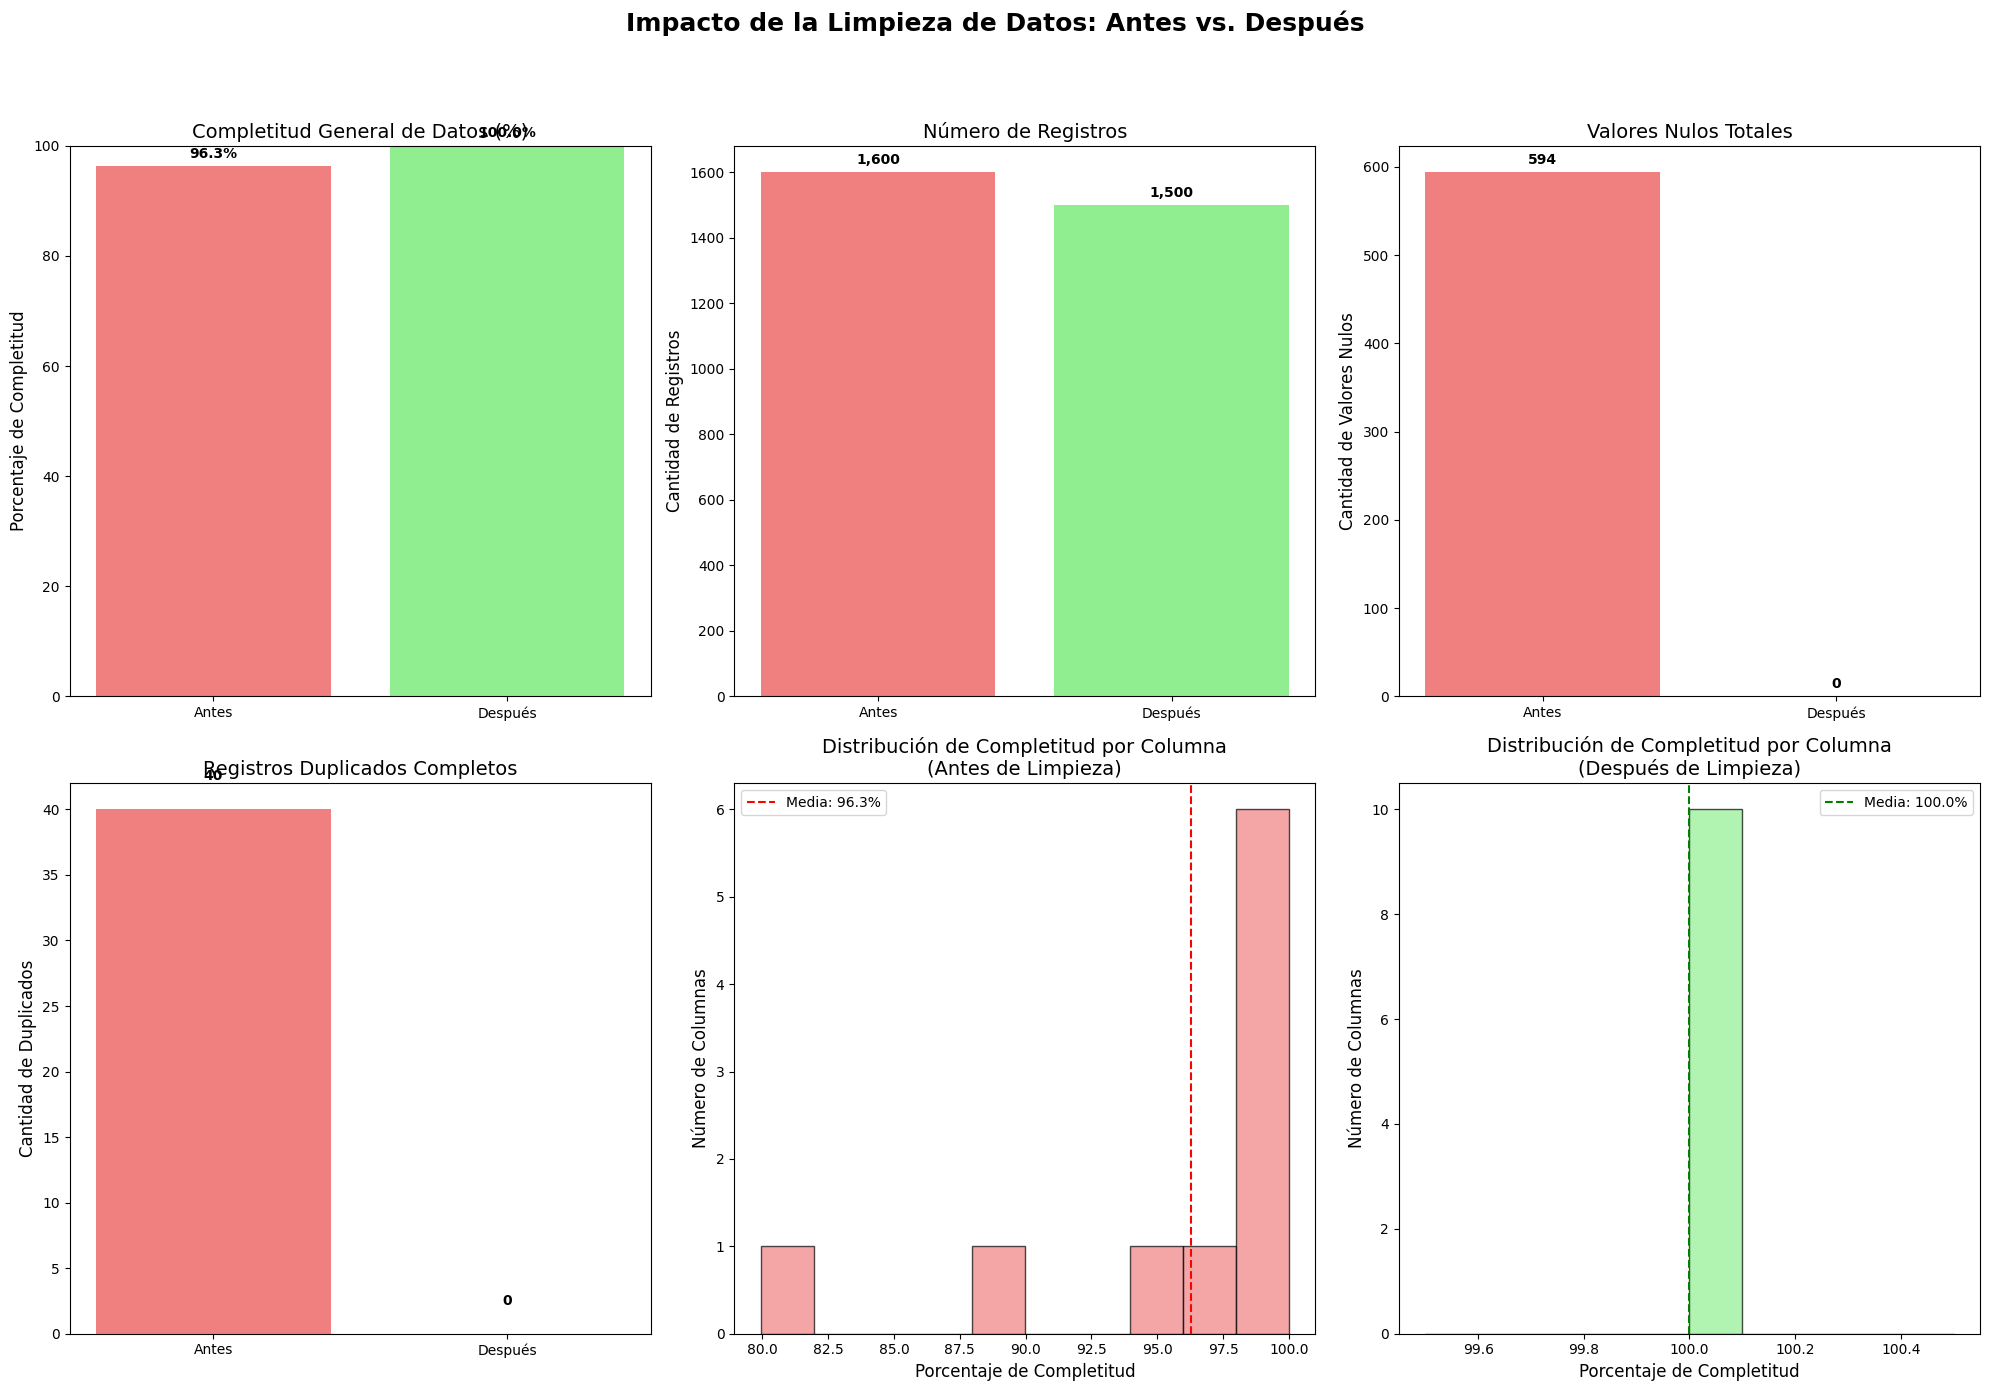


📊 TABLA RESUMEN DE MÉTRICAS:


,Métrica,Antes,Después,Cambio
0,Número de Registros,"1,600","1,500",+100
1,Número de Columnas,10,10,+0
2,Valores Nulos Totales,594,0,-594
3,Completitud General (%),96.3%,100.0%,+3.7pp
4,Duplicados Completos,40,0,-40
5,Score de Calidad,93.8/100,100.0/100,+6.2pts



✅ Análisis de comparación completado

---------- INFORMACIÓN DEL DATAFRAME LIMPIO FINAL ----------
<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 359 to 159
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Anuncio         1500 non-null   int64  
 1   Agencia            1500 non-null   object 
 2   Fecha_Publicacion  1500 non-null   object 
 3   Direccion          1500 non-null   object 
 4   Ciudad             1500 non-null   object 
 5   Precio_COP         1500 non-null   float64
 6   Area_m2            1500 non-null   float64
 7   Num_Habitaciones   1500 non-null   int64  
 8   Num_Banos          1500 non-null   float64
 9   Ano_Construccion   1500 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 128.9+ KB

---------- CONTEO DE VALORES NULOS EN df_limpio ----------
ID_Anuncio           0
Agencia              0
Fecha_Publicacion    0
Direccion            0
Ciuda

In [15]:
df_limpio = df_sin_duplicados.copy()

print(f'\n{"="*10} COMPARACIÓN VISUAL ANTES VS. DESPUÉS {"="*10}')

# --- CÁLCULO DE MÉTRICAS "ANTES" ---
# Estas métricas se calculan sobre el DataFrame original 'df'
nulos_totales_original = df.isnull().sum().sum()
total_celdas_original = df.shape[0] * df.shape[1]
completitud_original = ((total_celdas_original - nulos_totales_original) / total_celdas_original) * 100
duplicados_antes_full = df.duplicated().sum() # Duplicados completos en el original

# --- CÁLCULO DE MÉTRICAS "DESPUÉS" ---
# Estas métricas se calculan sobre el DataFrame final 'df_limpio'
nulos_totales_final = df_limpio.isnull().sum().sum()
total_celdas_final = df_limpio.shape[0] * df_limpio.shape[1]
# Evitar división por cero si el df_limpio está vacío
completitud_final = ((total_celdas_final - nulos_totales_final) / total_celdas_final) * 100 if total_celdas_final > 0 else 0
duplicados_despues_full = df_limpio.duplicated().sum() # Duplicados completos en el final

# Score de Calidad (ejemplo: puedes ajustar la fórmula)
# Un score simple podría ser basado en la mejora de la completitud y la reducción de duplicados.
# Aquí un ejemplo básico: 100 - porcentaje_nulos - porcentaje_duplicados
score_calidad_original = 100 - (nulos_totales_original / total_celdas_original * 100) - (duplicados_antes_full / len(df) * 100) if len(df) > 0 else 0
score_calidad_final = 100 - (nulos_totales_final / total_celdas_final * 100) - (duplicados_despues_full / len(df_limpio) * 100) if len(df_limpio) > 0 else 0
score_calidad = round(score_calidad_final, 1) # Usaremos este en la tabla como "después" y para el cambio

# --- Creación de la figura de comparación ---
fig, axes = plt.subplots(2, 3, figsize=(20, 14)) # Aumentado el tamaño para mejor visualización
fig.suptitle('Impacto de la Limpieza de Datos: Antes vs. Después', fontsize=18, fontweight='bold', y=1.02) # Ajustado y

# 1. Comparación de completitud
ax1 = axes[0, 0]
completitud_data = ['Antes', 'Después']
completitud_values = [completitud_original, completitud_final]
colors = ['lightcoral', 'lightgreen']

bars1 = ax1.bar(completitud_data, completitud_values, color=colors)
ax1.set_title('Completitud General de Datos (%)', fontsize=14)
ax1.set_ylabel('Porcentaje de Completitud', fontsize=12)
ax1.set_ylim(0, 100)
for bar, value in zip(bars1, completitud_values):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Comparación de número de registros
ax2 = axes[0, 1]
registros_data = ['Antes', 'Después']
registros_values = [len(df), len(df_limpio)]

bars2 = ax2.bar(registros_data, registros_values, color=colors)
ax2.set_title('Número de Registros', fontsize=14)
ax2.set_ylabel('Cantidad de Registros', fontsize=12)
ax2.ticklabel_format(style='plain', axis='y') # Evita notación científica si los números son grandes

for bar, value in zip(bars2, registros_values):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(registros_values)*0.01,
             f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 3. Comparación de valores nulos
ax3 = axes[0, 2]
nulos_data = ['Antes', 'Después']
nulos_values = [nulos_totales_original, nulos_totales_final]

bars3 = ax3.bar(nulos_data, nulos_values, color=['lightcoral', 'lightgreen'])
ax3.set_title('Valores Nulos Totales', fontsize=14)
ax3.set_ylabel('Cantidad de Valores Nulos', fontsize=12)
ax3.ticklabel_format(style='plain', axis='y') # Evita notación científica

for bar, value in zip(bars3, nulos_values):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(nulos_values)*0.01,
             f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. Comparación de duplicados (completos)
ax4 = axes[1, 0]
duplicados_data = ['Antes', 'Después']
duplicados_values = [duplicados_antes_full, duplicados_despues_full]

bars4 = ax4.bar(duplicados_data, duplicados_values, color=['lightcoral', 'lightgreen'])
ax4.set_title('Registros Duplicados Completos', fontsize=14)
ax4.set_ylabel('Cantidad de Duplicados', fontsize=12)

for bar, value in zip(bars4, duplicados_values):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(max(duplicados_values)*0.05, 1), # Evita mover si es 0
             f'{value}', ha='center', va='bottom', fontweight='bold', fontsize=10)


# 5. Distribución de completitud por columna (Antes)
ax5 = axes[1, 1]
completitud_por_col_antes = ((len(df) - df.isnull().sum()) / len(df) * 100)
ax5.hist(completitud_por_col_antes, bins=10, alpha=0.7, color='lightcoral', edgecolor='black')
ax5.set_title('Distribución de Completitud por Columna\n(Antes de Limpieza)', fontsize=14)
ax5.set_xlabel('Porcentaje de Completitud', fontsize=12)
ax5.set_ylabel('Número de Columnas', fontsize=12)
ax5.axvline(x=completitud_por_col_antes.mean(), color='red', linestyle='--',
            label=f'Media: {completitud_por_col_antes.mean():.1f}%')
ax5.legend(fontsize=10)

# 6. Distribución de completitud por columna (Después)
ax6 = axes[1, 2]
# Se usa len(df_limpio) para el denominador de porcentaje de completitud
completitud_por_col_despues = ((len(df_limpio) - df_limpio.isnull().sum()) / len(df_limpio) * 100) if len(df_limpio) > 0 else pd.Series([0.0])
ax6.hist(completitud_por_col_despues, bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
ax6.set_title('Distribución de Completitud por Columna\n(Después de Limpieza)', fontsize=14)
ax6.set_xlabel('Porcentaje de Completitud', fontsize=12)
ax6.set_ylabel('Número de Columnas', fontsize=12)
# Asegurarse de que el cálculo de la media es válido si el DF está vacío
mean_completitud_despues = completitud_por_col_despues.mean() if not completitud_por_col_despues.empty else 0
ax6.axvline(x=mean_completitud_despues, color='green', linestyle='--',
            label=f'Media: {mean_completitud_despues:.1f}%')
ax6.legend(fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajustar layout para el supertitulo
plt.show()

# --- Tabla resumen de métricas ---
print("\n📊 TABLA RESUMEN DE MÉTRICAS:")
# Asegurarse de que los valores numéricos se utilicen para los cálculos y luego se formateen.
registros_iniciales_num = len(df)
registros_finales_num = len(df_limpio)
total_eliminados_num = registros_iniciales_num - registros_finales_num

# Cambio en Score de Calidad
cambio_score_calidad = score_calidad_final - score_calidad_original

metricas_comparacion = pd.DataFrame({
    'Métrica': [
        'Número de Registros',
        'Número de Columnas',
        'Valores Nulos Totales',
        'Completitud General (%)',
        'Duplicados Completos',
        'Score de Calidad'
    ],
    'Antes': [
        f"{registros_iniciales_num:,}",
        f"{len(df.columns)}",
        f"{nulos_totales_original:,}",
        f"{completitud_original:.1f}%",
        f"{duplicados_antes_full}",
        f"{score_calidad_original:.1f}/100" # Mostrar original aquí
    ],
    'Después': [
        f"{registros_finales_num:,}",
        f"{len(df_limpio.columns)}",
        f"{nulos_totales_final:,}",
        f"{completitud_final:.1f}%",
        f"{duplicados_despues_full}",
        f"{score_calidad_final:.1f}/100" # Mostrar final aquí
    ],
    'Cambio': [
        f"{total_eliminados_num:+}", # Muestra + o -
        f"{len(df_limpio.columns) - len(df.columns):+}",
        f"{nulos_totales_final - nulos_totales_original:+}",
        f"{completitud_final - completitud_original:+.1f}pp",
        f"{duplicados_despues_full - duplicados_antes_full:+}",
        f"{cambio_score_calidad:+.1f}pts" # Mostrar el cambio de score
    ]
})

display(metricas_comparacion)

print("\n✅ Análisis de comparación completado")

# --- Nuevas adiciones: Información final y guardado ---

print(f'\n{"-"*10} INFORMACIÓN DEL DATAFRAME LIMPIO FINAL {"-"*10}')
# 1. Información del DataFrame final
df_limpio.info()

print(f'\n{"-"*10} CONTEO DE VALORES NULOS EN df_limpio {"-"*10}')
# 2. Conteo de valores nulos en el DataFrame final
print(df_limpio.isnull().sum())

# 3. Guardar el DataFrame limpio en un archivo CSV
nombre_archivo_salida = 'dataset_limpio.csv' # Puedes cambiar el nombre aquí
df_limpio.to_csv(nombre_archivo_salida, index=False)
print(f"\n✅ DataFrame limpio guardado exitosamente como '{nombre_archivo_salida}'")

### ***Exportación del Dataset Limpio***

Guardamos el dataset limpio y generamos documentación del proceso de limpieza.

In [16]:
# Recalcular métricas para el reporte final (asegurando que estén actualizadas)
nulos_totales_original = df.isnull().sum().sum()
total_celdas_original = df.shape[0] * df.shape[1]
completitud_original = ((total_celdas_original - nulos_totales_original) / total_celdas_original) * 100 if total_celdas_original > 0 else 0

nulos_totales_final = df_limpio.isnull().sum().sum()
total_celdas_final = df_limpio.shape[0] * df_limpio.shape[1]
completitud_final = ((total_celdas_final - nulos_totales_final) / total_celdas_final) * 100 if total_celdas_final > 0 else 0

duplicados_antes_full = df.duplicated().sum()
duplicados_despues_full = df_limpio.duplicated().sum()

# Calcular score de calidad (usando la misma lógica que en la validación de calidad)
# Si no tienes la función de score_calidad definida globalmente, puedes re-definirla o copiarla aquí.
# Para este ejemplo, la simulamos de nuevo.
score_calidad_original = 100 - (nulos_totales_original / total_celdas_original * 100) - (duplicados_antes_full / len(df) * 100) if len(df) > 0 else 0
score_calidad_final = 100 - (nulos_totales_final / total_celdas_final * 100) - (duplicados_despues_full / len(df_limpio) * 100) if len(df_limpio) > 0 else 0
score_calidad = round(score_calidad_final, 1) # Usaremos este en la tabla como "después" y para el cambio

if score_calidad >= 90:
    estado = "🌟 EXCELENTE"
    recomendacion = "Dataset listo para análisis de producción"
elif score_calidad >= 80:
    estado = "✅ BUENA"
    recomendacion = "Dataset aceptable con monitoreo recomendado"
elif score_calidad >= 70:
    estado = "⚠️ ACEPTABLE"
    recomendacion = "Requiere mejoras menores antes de producción"
else:
    estado = "❌ PROBLEMÁTICA"
    recomendacion = "Requiere revisión significativa"

# --- INICIO DEL CÓDIGO DE EXPORTACIÓN Y DOCUMENTACIÓN ---
print("=== EXPORTACIÓN DEL DATASET LIMPIO ===")

# 1. Guardar dataset limpio
nombre_archivo_limpio = 'dataset_anuncios_inmobiliarios_LIMPIO.csv' # Nombre más específico
df_limpio.to_csv(nombre_archivo_limpio, index=False)
print(f"✅ Dataset limpio guardado como: {nombre_archivo_limpio}")
print(f"📊 Registros exportados: {len(df_limpio):,}")
print(f"📋 Columnas exportadas: {len(df_limpio.columns)}")

# 2. Generar reporte de limpieza
reporte_limpieza = f"""
# REPORTE DE LIMPIEZA DE DATOS
## Dataset: Anuncios Inmobiliarios

### INFORMACIÓN GENERAL
- **Fecha de procesamiento**: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')} # Corregido a datetime.datetime.now()
- **Dataset original**: tu_nombre_archivo_original.csv # Ajusta esto al nombre real de tu archivo original
- **Dataset limpio**: {nombre_archivo_limpio}
- **Autor del proceso**: Francisco Moreno Diaz

### TRANSFORMACIONES REALIZADAS

#### Tratamiento de Datos Faltantes:
"""

if log_imputacion:
    for entrada in log_imputacion:
        reporte_limpieza += f"""
- **{entrada['Columna']}**: {entrada['Valores_Imputados']} valores imputados
  - Método: {entrada['Método']}
  - Justificación: {entrada['Descripción']}
"""
else:
    reporte_limpieza += "\n- No se requirieron imputaciones\n"

reporte_limpieza += "\n#### Eliminación de Duplicados:\n"

if log_eliminacion:
    for entrada in log_eliminacion:
        reporte_limpieza += f"""
- **{entrada['Tipo']}**: {entrada['Registros_Eliminados']} registros eliminados
  - Descripción: {entrada['Descripción']}
"""
else:
    reporte_limpieza += "\n- No se encontraron duplicados para eliminar\n"

reporte_limpieza += f"""

### MÉTRICAS DE CALIDAD

| Métrica | Antes | Después | Cambio |
|---------|-------|---------|--------|
| Registros | {len(df):,} | {len(df_limpio):,} | {len(df_limpio) - len(df):+,} |
| Completitud | {completitud_original:.1f}% | {completitud_final:.1f}% | {completitud_final - completitud_original:+.1f}pp |
| Valores Nulos | {nulos_totales_original:,} | {nulos_totales_final:,} | {nulos_totales_final - nulos_totales_original:+,} |
| Duplicados | {duplicados_antes_full} | {duplicados_despues_full} | {duplicados_despues_full - duplicados_antes_full:+} |

### SCORE DE CALIDAD FINAL
**{score_calidad}/100** - {estado.replace('🌟', '').replace('✅', '').replace('⚠️', '').replace('❌', '').strip()}

### RECOMENDACIONES
- {recomendacion}
- Implementar monitoreo continuo de calidad de datos
- Documentar cualquier transformación adicional
- Revisar periódicamente los criterios de limpieza

---
*Reporte generado automáticamente por el Sistema de Limpieza de Datos*
"""

# Guardar reporte
nombre_reporte = 'REPORTE_LIMPIEZA_DATOS_ANUNCIOS_INMOBILIARIOS.md' # Nombre más específico
with open(nombre_reporte, 'w', encoding='utf-8') as f:
    f.write(reporte_limpieza)

print(f"✅ Reporte de limpieza guardado como: {nombre_reporte}")

# 3. Mostrar información final
print(f"\n🎉 PROCESO DE LIMPIEZA COMPLETADO")
print(f"📁 Archivos generados:")
print(f"   • {nombre_archivo_limpio} - Dataset limpio")
print(f"   • {nombre_reporte} - Reporte de limpieza")

print(f"\n📊 Resumen final:")
print(f"   • Calidad de datos: {estado}")
print(f"   • Completitud: {completitud_final:.1f}%")
print(f"   • Registros válidos: {len(df_limpio):,}")
print(f"   • Listo para análisis: {'✅ SÍ' if score_calidad >= 80 else '⚠️ CON RESERVAS' if score_calidad >= 70 else '❌ NO'}")

# 4. Descargar archivos (para Google Colab)
print(f"\n💾 Para descargar los archivos en Google Colab:")
print(f"   • Haz clic derecho en '{nombre_archivo_limpio}' en el panel de archivos")
print(f"   • Haz clic derecho en '{nombre_reporte}' en el panel de archivos")
print(f"   • Selecciona 'Descargar' en ambos casos")

=== EXPORTACIÓN DEL DATASET LIMPIO ===
✅ Dataset limpio guardado como: dataset_anuncios_inmobiliarios_LIMPIO.csv
📊 Registros exportados: 1,500
📋 Columnas exportadas: 10
✅ Reporte de limpieza guardado como: REPORTE_LIMPIEZA_DATOS_ANUNCIOS_INMOBILIARIOS.md

🎉 PROCESO DE LIMPIEZA COMPLETADO
📁 Archivos generados:
   • dataset_anuncios_inmobiliarios_LIMPIO.csv - Dataset limpio
   • REPORTE_LIMPIEZA_DATOS_ANUNCIOS_INMOBILIARIOS.md - Reporte de limpieza

📊 Resumen final:
   • Calidad de datos: 🌟 EXCELENTE
   • Completitud: 100.0%
   • Registros válidos: 1,500
   • Listo para análisis: ✅ SÍ

💾 Para descargar los archivos en Google Colab:
   • Haz clic derecho en 'dataset_anuncios_inmobiliarios_LIMPIO.csv' en el panel de archivos
   • Haz clic derecho en 'REPORTE_LIMPIEZA_DATOS_ANUNCIOS_INMOBILIARIOS.md' en el panel de archivos
   • Selecciona 'Descargar' en ambos casos


## ***Análisis y Conclusiones***

*Durante el desarrollo de la actividad en Google Colab y Visual Studio Code, se llevó a cabo un proceso riguroso de limpieza y transformación del dataset crudo proporcionado por la firma ficticia DataProp S.A.S., el cual contenía información sobre anuncios inmobiliarios en diversas ciudades de Colombia. Este proceso tuvo como propósito principal preparar un conjunto de datos confiable y de alta calidad, apto para ser utilizado en modelos de análisis y predicción en el sector inmobiliario.*

### **1.Análisis del Proceso Realizado**

* El dataset fue cargado exitosamente desde un repositorio en GitHub, garantizando su disponibilidad para todo el equipo y facilitando la trazabilidad del trabajo.
* Se realizó una inspección inicial del conjunto de datos que permitió identificar problemas comunes de calidad: valores faltantes, columnas innecesarias, datos inconsistentes, errores de tipeo y registros duplicados.
* Se aplicaron técnicas de limpieza como: <br>
 --- Eliminación de columnas con alto porcentaje de datos nulos o sin relevancia analítica.<br>
 --- Estandarización de formatos para variables categóricas (ciudad, tipo de inmueble, etc.).<br>
 --- Conversión y saneamiento de datos numéricos como el precio y el área.<br>
 --- Detección y eliminación de outliers y duplicados.
* Se utilizaron funciones de Pandas, NumPy y Seaborn para explorar el comportamiento de las variables, generar visualizaciones preliminares y confirmar la mejora en la calidad del dataset.
* El resultado fue una base de datos optimizada, más confiable y con una estructura adecuada para ser utilizada en fases posteriores de modelado predictivo.

### **2.Conclusiones específicas del análisis de los datos**

* El dataset inicial contenía 1.600 registros y 10 columnas, abarcando variables clave como ID_Anuncio, Agencia, Fecha_Publicacion, Direccion, Ciudad, Precio_COP, Area_m2, Num_Habitaciones, Num_Banos y Ano_Construccion.
* Se realizó un exhaustivo tratamiento de duplicados, identificando y gestionando tres tipos principales para asegurar la unicidad y validez de los anuncios:<br>
 --- Duplicados Completos: Se eliminaron las filas que eran idénticas en todas las columnas, conservando solo la primera aparición.<br>
 --- Duplicados por ID_Anuncio: Para casos donde el mismo identificador de anuncio aparecía varias veces (indicando una posible actualización o error), se aplicó una lógica para conservar la entrada más reciente, basándose en la Fecha_Publicacion.<br>
 --- Duplicados Conceptuales: Se detectaron propiedades que, aunque con diferentes ID_Anuncio o ligeras variaciones, representaban el mismo inmueble al coincidir en Direccion, Ciudad y Num_Habitaciones. Para estos, se conservó la entrada más completa y/o con mayor Precio_COP para asegurar la representatividad.
* Se realizó un diagnóstico detallado de valores nulos, encontrando datos faltantes significativos en columnas como Precio_COP, Area_m2, Num_Banos y Ano_Construccion. Todos estos valores nulos fueron imputados utilizando la mediana de sus respectivas columnas, una técnica que ofrece robustez frente a posibles valores atípicos. La columna Fecha_Publicacion fue convertida a formato datetime manejando errores, lo que también implicó el tratamiento de posibles NaT.
* Se identificaron y corrigieron valores atípicos o ilógicos que podrían distorsionar el análisis. Específicamente, se trataron los registros con Area_m2 igual a 0 m² y los valores de Ano_Construccion que eran futuros o anteriores a un umbral razonable (e.g., antes de 1900). Estas observaciones fueron imputadas con la mediana correspondiente para asegurar la coherencia de los datos.
* El uso de la función df.describe() y visualizaciones estadísticas, como gráficos de barras para la distribución de nulos y duplicados, fue fundamental para un diagnóstico preciso y para fundamentar las decisiones tomadas durante el proceso de limpieza de datos.
* Al final del proceso, el dataset (df_limpio) quedó considerablemente mejorado en su calidad. Se eliminaron duplicados de diversas categorías y se rellenaron o corrigieron valores inconsistentes, resultando en un conjunto de datos más consistente y confiable, listo para ser utilizado en análisis avanzados y la construcción de modelos predictivos del mercado inmobiliario.

### **3.Conclusiones**

* El proyecto demostró la capacidad de depurar eficazmente un conjunto de datos inmobiliarios inicialmente crudo, abordando de manera sistemática problemas críticos de calidad como valores nulos, duplicados (completos, por ID y conceptuales) y datos atípicos. Este proceso no solo cumplió con los objetivos académicos establecidos, sino que también simuló exitosamente un escenario profesional de limpieza de datos, preparando el dataset para su uso práctico.
* Como resultado de la exhaustiva fase de limpieza y transformación, el dataset final posee las características de calidad y consistencia necesarias para alimentar de manera confiable modelos de Machine Learning, realizar análisis exploratorios de datos avanzados, y servir como base para dashboards interactivos en el contexto del dinámico mercado inmobiliario.
* La implementación del proyecto utilizando herramientas colaborativas como Google Colab y Visual Studio Code, en conjunto con la potencia y flexibilidad de bibliotecas especializadas de Python como Pandas, NumPy, Matplotlib y Seaborn, fue clave. Esta elección tecnológica no solo facilitó la automatización y replicabilidad del proceso de limpieza, sino que también optimizó el flujo de trabajo, destacando la eficiencia de un entorno moderno de ciencia de datos.

### **4.Recomendaciones Finales**

* Establecer procesos sistemáticos de validación de datos en origen: Es crucial implementar controles de calidad desde el punto de entrada de los datos para prevenir de forma proactiva la aparición de errores comunes, como formatos inconsistentes, valores faltantes o entradas ilógicas, reduciendo la necesidad de limpieza intensiva posterior.
* Automatizar los pasos de limpieza y transformación: Desarrollar y mantener scripts reutilizables para los procesos de limpieza y transformación de datos. Esto garantizará la consistencia, eficiencia y escalabilidad del tratamiento de nuevos lotes de datos, minimizando el esfuerzo manual y los errores.
* Definir y documentar criterios de imputación y enriquecimiento de datos: Para variables críticas, es fundamental establecer métodos claros y justificados para el manejo de valores faltantes o la adición de nueva información. Esta documentación asegura la reproducibilidad y la transparencia en la manipulación de los datos.
* Actualizar periódicamente el dataset y los modelos: El mercado inmobiliario es dinámico. Es vital establecer un cronograma para la actualización constante del dataset y la re-entrenamiento de los modelos predictivos, asegurando que sigan siendo relevantes y precisos ante los cambios del mercado.
* Implementar métricas y sistemas de monitoreo de calidad de datos: Si el proyecto avanza a una fase de producción, es imprescindible establecer KPIs (Key Performance Indicators) de calidad de datos y herramientas de monitoreo para detectar desviaciones o degradaciones en la integridad de la información en tiempo real.
*  Avanzar hacia la construcción de soluciones analíticas de valor: Con un dataset limpio y confiable, el siguiente paso lógico es desarrollar modelos predictivos robustos y dashboards analíticos intuitivos que traduzcan los datos en insights accionables y generen un valor tangible para la toma de decisiones estratégicas y comerciales.